In [8]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

In [9]:
! ls /kaggle/working
! echo $PYTORCH_NO_CUDA_MEMORY_CACHING
# %env PYTORCH_NO_CUDA_MEMORY_CACHING=1
# ! rm -rf /kaggle/working/*

BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1
fold_save
state.db



In [10]:

BATCH_SIZE = 16
# VALIDATION_SPLIT = 0.2
TEST_SPLIT = 0.1
NUM_EPOCHS = 50

# Constants
FRAME_HEIGHT = 224
FRAME_WIDTH = 224
SEQUENCE_LENGTH = 30

ARCHITECTURE = '2D_CNN_LSTM'
# CNN_TYPE = 'resnet18'
CNN_TYPE = 'vgg16'
# CNN_TYPE = 'mobilenet_v3'
# LSTM_HIDDEN_SIZE=512
LSTM_HIDDEN_SIZE= 128
LSTM_LAYERS = 1
DROPOUT = 0.5
LEARNING_RATE = 0.0005
NUM_LAYERS_TO_UNFREEZE = 1
FROZEN = True
WEIGHT_DECAY = 0.01

In [11]:
import os

# root directory of uploaded dataset
dataset_root = "/kaggle/input/updated-yoga-dataset/"
video_dataset_root = '/kaggle/input/yoga-video/'

video_dir = os.path.join(video_dataset_root, "NEW_SHORTS/")
metadata_dir = os.path.join(dataset_root, "data/data/")

# csv file containing labels
csv_path = os.path.join(metadata_dir, "3DYoga90_corrected.csv")

# path to store additional metadata files
meta_info_path = os.path.join('/kaggle/working/', 'fold_save')  # same as metadata_dir
os.makedirs(meta_info_path, exist_ok=True)
# paths for logging valid and corrupted samples
sequence_path = os.path.join(video_dir, "downloaded_log.txt")
corrupted_path = os.path.join('/kaggle/working/', "corrupted_log.txt")

# directory to store preprocessed videos
preprocessed_dir = os.path.join(dataset_root, "RESIZED_DATA")

FOLD_CHECKPOINT_PATH = os.path.join('/kaggle/working/', 'FOLD_CHECKPOINT')


# print paths for verification
print(f"dataset root: {dataset_root}")
print(f"video directory: {video_dir}")
print(f"metadata directory: {metadata_dir}")
print(f"csv path: {csv_path}")
print(f"metadata info path: {meta_info_path}")
print(f"valid sequences log: {sequence_path}")
# print(f"corrupted sequences log: {corrupted_log_path}")
print(f"preprocessed data directory: {preprocessed_dir}")

dataset root: /kaggle/input/updated-yoga-dataset/
video directory: /kaggle/input/yoga-video/NEW_SHORTS/
metadata directory: /kaggle/input/updated-yoga-dataset/data/data/
csv path: /kaggle/input/updated-yoga-dataset/data/data/3DYoga90_corrected.csv
metadata info path: /kaggle/working/fold_save
valid sequences log: /kaggle/input/yoga-video/NEW_SHORTS/downloaded_log.txt
preprocessed data directory: /kaggle/input/updated-yoga-dataset/RESIZED_DATA


In [12]:
!ls /kaggle/input
!ls /kaggle/input/yoga-dataset

updated-yoga-dataset  yoga-video
ls: cannot access '/kaggle/input/yoga-dataset': No such file or directory


In [13]:
!ls /kaggle/input/3dyoga90/data/data/

ls: cannot access '/kaggle/input/3dyoga90/data/data/': No such file or directory


In [14]:
import os

# Define paths
paths_to_check = {
    "dataset root": dataset_root,
    "video directory": video_dir,
    "metadata directory": metadata_dir,
    "csv file": csv_path,
    "metadata info path": meta_info_path,
    "valid sequences log": sequence_path,
    "corrupted sequences log": corrupted_path,
    "preprocessed data directory": preprocessed_dir
}

# Check existence
for name, path in paths_to_check.items():
    if os.path.exists(path):
        if os.path.isfile(path):
            print(f"[✔] {name} exists and is a file: {path}")
        elif os.path.isdir(path):
            print(f"[✔] {name} exists and is a directory: {path}")
    else:
        print(f"[✘] {name} does NOT exist: {path}")
##

[✔] dataset root exists and is a directory: /kaggle/input/updated-yoga-dataset/
[✔] video directory exists and is a directory: /kaggle/input/yoga-video/NEW_SHORTS/
[✔] metadata directory exists and is a directory: /kaggle/input/updated-yoga-dataset/data/data/
[✔] csv file exists and is a file: /kaggle/input/updated-yoga-dataset/data/data/3DYoga90_corrected.csv
[✔] metadata info path exists and is a directory: /kaggle/working/fold_save
[✔] valid sequences log exists and is a file: /kaggle/input/yoga-video/NEW_SHORTS/downloaded_log.txt
[✘] corrupted sequences log does NOT exist: /kaggle/working/corrupted_log.txt
[✔] preprocessed data directory exists and is a directory: /kaggle/input/updated-yoga-dataset/RESIZED_DATA


In [15]:
# file_path = os.path.join(video_dir, "missing_videos_log.txt")

# # Count lines in the file
# with open(file_path, "r", encoding="utf-8") as f:
#     line_count = sum(1 for _ in f)

# print(f"Number of lines in missing_videos.txt: {line_count}")

In [16]:
file_path = os.path.join(video_dir, "downloaded_log.txt")

# Count lines in the file
with open(file_path, "r", encoding="utf-8") as f:
    line_count = sum(1 for _ in f)

print(f"Number of lines in missing_videos.txt: {line_count}")

Number of lines in missing_videos.txt: 1556


In [17]:
!ls /kaggle/working

BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1
fold_save
state.db


In [18]:
import os
from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')
SAVE_PATH = os.path.join(
    '/kaggle/working/',
    f'BS{BATCH_SIZE}_KAGGLE_CROSS_FOLD_{ARCHITECTURE}_{today}_LR{LEARNING_RATE}_LHS{LSTM_HIDDEN_SIZE}_LL{LSTM_LAYERS}_CT{CNN_TYPE}_FROZEN_{FROZEN}_NLUF_{NUM_LAYERS_TO_UNFREEZE}'
)
os.makedirs(SAVE_PATH, exist_ok=True)
print(SAVE_PATH)

pose_list = ['downward-dog','standing-forward-bend','half-way-lift',
             'mountain','chair','cobra','cockerel','extended-triangle',
             'extended-side-angle','corpse','staff','wind-relieving','fish'
            ]

subset_of_poses = pose_list
NUM_CLASSES = len(pose_list)

/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1


In [19]:
# SAVE_PATH = '/kaggle/working/BS32_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-23_LR0.001_LHS512_LL1_CTresnet18'

In [20]:
print(torch.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

2.5.1+cu121


In [21]:
# meta_info_path = os.path.join(base_path, 'data')
# pose_index = pd.read_csv(f'{meta_info_path}/pose-index.csv')
# sequence_index = pd.read_csv(f'{meta_info_path}/3DYoga90_corrected.csv')

What does each file tell?

1.) pose-index.csv -> Shows Heirarchical organization (THEN NOTHING MORE)

2.) 3DYoga90.csv -> Total Main Info(i.e. along with RGB stream){
    SequneceID: Parquet_FILE_NAME,
    URL,
    Frame Start and Frame Stop,
    Pose Name, Training Test Split
} `Difference between train and test? where to get the validation set from? How to do data augmentation?

3.) Parquet Files -> {
    Frame Number {
        33 Landmarks
    },
    row-id: FrameNumber-TYPE-Landmark_index,
    Coordinates: {x, y, z}
}

`PLEASE NOTE: The landmark coordinates are all normalized`

# Getting the data ready

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision.transforms.v2 as T
import random

class VideoAugmentationPipeline:
    """Video augmentation pipeline using batch transforms from torchvision.transforms.v2"""
    def __init__(self, spatial_aug_config=None, temporal_aug_config=None):
        # Default config with all augmentations enabled
        default_spatial_config = {
            'random_resized_crop': {'enabled': False, 'scale': (0.9, 1.0)},
            'random_horizontal_flip': {'enabled': True, 'p': 0.5},
            'color_jitter': {'enabled': True, 'brightness': 0.1, 'contrast': 0.1, 'saturation': 0.1, 'p': 0.5},
            'gaussian_blur': {'enabled': True, 'p': 0.5},
            'random_rotation': {'enabled': True, 'degrees': (-5, 5),'p':0.5},
        }

        default_temporal_config = {
            'temporal_crop': {'enabled': True, 'crop_size': 0.9},
            'temporal_mask': {'enabled': True, 'n_masks': 1, 'mask_size': 0.1},
        }

        # Update default config with user-provided config
        self.spatial_aug_config = self._update_config(default_spatial_config, spatial_aug_config)
        self.temporal_aug_config = self._update_config(default_temporal_config, temporal_aug_config)

        # Build transforms that can handle batch inputs
        self.spatial_transforms = self._build_spatial_transforms()

    def _update_config(self, default_config, user_config):
        """Update default config with user config, disabling augmentations not in user config"""
        if user_config is None:
            return default_config

        updated_config = default_config.copy()
        for aug_name in updated_config:
            if aug_name in user_config:
                # # Update probability if provided
                # if isinstance(user_config[aug_name], dict):
                #     updated_config[aug_name].update(user_config[aug_name])
                # else:
                    updated_config[aug_name]['p'] = user_config[aug_name]
            else:
                # Disable augmentation if not in user config
                updated_config[aug_name]['enabled'] = False
        return updated_config

    def _build_spatial_transforms(self):
        """Build composition of spatial transforms that support batch processing"""
        transform_list = []

        if self.spatial_aug_config['random_resized_crop']['enabled']:
            transform_list.append(
                T.RandomResizedCrop(
                    size=(224, 224),
                    scale=self.spatial_aug_config['random_resized_crop']['scale'],
                    antialias=True
                )
            )

        if self.spatial_aug_config['random_horizontal_flip']['enabled']:
            transform_list.append(
                T.RandomHorizontalFlip(p=self.spatial_aug_config['random_horizontal_flip']['p'])
            )

        if self.spatial_aug_config['color_jitter']['enabled']:
            transform_list.append(
                T.ColorJitter(
                    brightness=self.spatial_aug_config['color_jitter']['brightness'],
                    contrast=self.spatial_aug_config['color_jitter']['contrast'],
                    saturation=self.spatial_aug_config['color_jitter']['saturation']
                )
            )

        if self.spatial_aug_config['gaussian_blur']['enabled']:
            transform_list.append(
                T.GaussianBlur(
                    kernel_size=(5, 5),
                    sigma=(0.1, 1.0)
                )
            )

        if self.spatial_aug_config['random_rotation']['enabled']:
            if random.random() < self.spatial_aug_config['random_rotation']['p']:
                transform_list.append(
                    T.RandomRotation(
                        degrees=self.spatial_aug_config['random_rotation']['degrees'],
                        interpolation=T.InterpolationMode.BILINEAR
                    )
                )

        return T.Compose(transform_list)

    def apply_temporal_augmentation(self, video_tensor):
        """Apply temporal augmentations to video tensor"""
        if not any(cfg['enabled'] for cfg in self.temporal_aug_config.values()):
            return video_tensor

        T, C, H, W = video_tensor.shape

        # Temporal crop
        if self.temporal_aug_config['temporal_crop']['enabled']:
            crop_size = int(T * self.temporal_aug_config['temporal_crop']['crop_size'])
            start_idx = random.randint(0, T - crop_size)
            video_tensor = video_tensor[start_idx:start_idx + crop_size]

        # Temporal masking
        if self.temporal_aug_config['temporal_mask']['enabled']:
            T = len(video_tensor)
            mask_size = int(T * self.temporal_aug_config['temporal_mask']['mask_size'])
            for _ in range(self.temporal_aug_config['temporal_mask']['n_masks']):
                if random.random() < 0.5:
                    start_idx = random.randint(0, T - mask_size)
                    video_tensor[start_idx:start_idx + mask_size] = 0

        return video_tensor

    def __call__(self, video_tensor):
        """Apply transforms to entire video tensor at once"""
        # Input shape: [T, C, H, W]
        # Reshape to [T, C, H, W] -> [1, T, C, H, W] for batch processing
        video_tensor = video_tensor.unsqueeze(0)

        # Apply spatial transforms to entire video tensor at once
        # transforms.v2 will maintain temporal consistency automatically
        video_tensor = self.spatial_transforms(video_tensor)

        # Remove batch dimension
        video_tensor = video_tensor.squeeze(0)

        # Apply temporal augmentations
        # video_tensor = self.apply_temporal_augmentation(video_tensor)

        return video_tensor

In [23]:
import os
import torch
import pandas as pd
import numpy as np
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import imageio
import random

class YogaVideoDataset(Dataset):
    def __init__(self, csv_path, sequence_path, pose_list, video_dir, preprocessed_dir,
                 spatial_aug_config=None, temporal_aug_config=None, use_augmentation=True, aug_ratio = 0.5):
        with open(sequence_path) as f:
            sequence_list = f.read().splitlines()
            sequence_list = [int(x) for x in sequence_list]

        self.df = pd.read_csv(csv_path)
        self.df = self.df[self.df['sequence_id'].isin(sequence_list)]
        self.df = self.df[self.df['l3_pose'].isin(pose_list)]

        self.pose_to_label = {pose: idx for idx, pose in enumerate(pose_list)}
        self.length_of_dataset = len(self.df)
        self.idx_to_label = {}

        self.video_dir = video_dir
        self.preprocessed_dir = preprocessed_dir
        os.makedirs(self.preprocessed_dir, exist_ok=True)

        for idx in range(len(self.df)):
            fname, pose_name, split = self.df.iloc[idx]
            if split == 'train':
                self.train_idx.append(idx)
            elif split == 'test':
                self.test_idx.append(idx)

        # Initialize augmentation pipeline
        self.augmentation_pipeline = VideoAugmentationPipeline(
            spatial_aug_config=spatial_aug_config,
            temporal_aug_config=temporal_aug_config
        )

        self.cache = dict()
        self.augmentation_ratio = aug_ratio
        self.use_augmentation = use_augmentation

        self.transforms = transforms.Compose([
            transforms.Resize((FRAME_HEIGHT, FRAME_WIDTH)),
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406],
            #                      std=[0.229, 0.224, 0.225])
        ])
        self.normalization = transforms.Compose([
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
    def __len__(self):
        return self.length_of_dataset

    def __getitem__(self, i):
        sequence_id = self.df.iloc[i]['sequence_id']
        pose = self.df.iloc[i]['l3_pose']
        label = self.pose_to_label[pose]
        self.idx_to_label[i] = sequence_id
        # Load preprocessed frames
        if sequence_id in self.cache:
            frames = self.cache[sequence_id]
        else:
            file_path = os.path.join(self.preprocessed_dir, f"{sequence_id}.pt")
            if not os.path.exists(file_path):
                video_path = os.path.join(self.video_dir, f"{sequence_id}.mp4")
                frames = self._get_frames(video_path)
                torch.save(frames, file_path)
            else:
                frames = torch.load(file_path, weights_only=True)
            # self.cache[sequence_id] = frames

        # Choose whether to use augmented or original data
        use_augmented_data = self.use_augmentation and self.augmentation_ratio < random.random()
        if use_augmented_data:
            frames = self.augmentation_pipeline(frames)

        frames = self.normalization(frames)
        return frames, label

    def _get_frames(self, video_path, sequence_length=SEQUENCE_LENGTH, corrupted_log_path = corrupted_path):
        reader = imageio.get_reader(video_path, 'ffmpeg')
        fps = imageio.get_reader(video_path, 'ffmpeg').get_meta_data()['fps'] // 1
        total_frames = reader.count_frames()



        # Calculate frame indices to sample
        indices = np.linspace(0, total_frames - 1, num=sequence_length, dtype=int)
        t_indices =[]
        frames = []
        for i, frame in enumerate(reader):
            if i in indices:
                frame = Image.fromarray(frame)
                frame = self.transforms(frame)
                frames.append(frame)
                t_indices.append(i)
                # print('Frame number', i % fps, 'Frame', i)

        reader.close()

        # If extracted frames do not match sequence_length, log to corrupted_log_path
        if len(frames) != sequence_length:
            with open(corrupted_log_path, "a") as f:
                f.write(f"Corrupted video: {video_path}\n")
                f.write(f"Expected {sequence_length} frames, got {len(frames)}\n")
                f.write(f"Selected frame indices: {t_indices}\n\n")
            print(f"Processing video: {video_path}")
            print(f"Total frames: {total_frames}")
            print(f"Total frames: {t_indices}")
            print(f"Final frame count: {len(frames)}")


        # Ensure frames tensor has correct shape
        if frames:
            frames = torch.stack(frames)
        else:
            frames = torch.empty(0)  # Return an empty tensor if no frames are found

        return frames

In [24]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torch.nn.utils.rnn as rnn_utils
import math

class AttentionLayer(nn.Module):
    """Basic attention mechanism for sequence processing"""
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.W = nn.Linear(input_size, hidden_size)
        self.V = nn.Linear(hidden_size, 1)
        
        nn.init.xavier_uniform_(self.W.weight)
        nn.init.xavier_uniform_(self.V.weight)
        nn.init.zeros_(self.W.bias)
        nn.init.zeros_(self.V.bias)

    def forward(self, lstm_output, mask=None):
        att_scores = self.V(torch.tanh(self.W(lstm_output))).squeeze(-1)
        if mask is not None:
            att_scores = att_scores.masked_fill(mask == 0, -1e9)
        att_weights = F.softmax(att_scores, dim=1)
        context = (lstm_output * att_weights.unsqueeze(-1)).sum(1)
        return context, att_weights

class CNNLSTM(nn.Module):
    """Modular video action classifier with various configuration options"""
    def __init__(self, num_classes,
                 lstm_hidden_size=512,
                 lstm_layers=1,
                 dropout=0.5,
                 freeze_cnn=True,
                 use_attention=False,
                 cnn_model='resnet18'):

        super().__init__()
        self.use_attention = use_attention
        self.cnn_model = cnn_model

        # CNN Feature Extractor
        self.cnn, self.cnn_feature_size = self._build_cnn(cnn_model)
        self._set_cnn_freeze(freeze_cnn)

        lstm_input_size = self.cnn_feature_size

        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            dropout=dropout if lstm_layers > 1 else 0
        )
        
        self._init_lstm_weights()

        if self.use_attention:
            self.attention = AttentionLayer(
                input_size=lstm_hidden_size,
                hidden_size=lstm_hidden_size
            )

        self.classifier = self._build_classifier(
            lstm_hidden_size,
            num_classes,
            dropout
        )

        self._initialize_weights()

    def _build_cnn(self, model_name):
        """Initialize CNN feature extractor with proper feature sizes"""
        if model_name == 'resnet18':
            cnn = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
            return nn.Sequential(*list(cnn.children())[:-2]), 512
        elif model_name == 'mobilenet_v3':
            cnn = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)
            return nn.Sequential(*list(cnn.children())[:-2]), 576
        elif model_name == 'vgg16':
            cnn = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
            return nn.Sequential(*list(cnn.features)), 512
        elif model_name == 'vgg19':
            cnn = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
            return nn.Sequential(*list(cnn.features)), 512
        elif model_name == 'densenet121':
            cnn = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
            return nn.Sequential(*list(cnn.children())[:-1]), 1024
        elif model_name == 'densenet201':
            cnn = models.densenet201(weights=models.DenseNet201_Weights.DEFAULT)
            return nn.Sequential(*list(cnn.children())[:-1]), 1920
        else:
            raise ValueError(f"Unsupported CNN model: {model_name}")

    def _build_classifier(self, input_size, num_classes, dropout):
        return nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(input_size, num_classes)
        )

    def _init_lstm_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)

    def _initialize_weights(self):
        for m in self.classifier.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def _set_cnn_freeze(self, freeze):
        for param in self.cnn.parameters():
            param.requires_grad = not freeze

    def forward(self, x, lengths):
        batch_size, seq_len = x.size(0), x.size(1)
        x = x.view(batch_size*seq_len, *x.size()[2:])
        x = self.cnn(x)
        
        # Handle different CNN output shapes
        if self.cnn_model in ['resnet18', 'mobilenet_v3', 'vgg16', 'vgg19', 'densenet121', 'densenet201']:
            x = F.adaptive_avg_pool2d(x, (1, 1))
            
        x = x.view(batch_size, seq_len, -1)

        packed_x = rnn_utils.pack_padded_sequence(
            x, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        packed_out, _ = self.lstm(packed_x)
        lstm_out, _ = rnn_utils.pad_packed_sequence(packed_out, batch_first=True)

        if self.use_attention:
            mask = self._create_attention_mask(lstm_out.size(1), lengths)
            context, _ = self.attention(lstm_out, mask)
        else:
            # print(lengths)
            indices = torch.clamp(lengths - 1, min=0)
            # print(indices)
            context = lstm_out[torch.arange(batch_size), indices, :]

        return self.classifier(context)

    def _create_attention_mask(self, max_len, lengths):
        device = lengths.device
        return torch.arange(max_len, device=device).expand(len(lengths), max_len) < lengths.unsqueeze(1)

    def unfreeze_cnn_layers(self, num_layers=3, start_from_end=True):
        all_cnn_layers = []
        for name, module in self.cnn.named_modules():
            if isinstance(module, (nn.Conv2d, nn.BatchNorm2d)):
                all_cnn_layers.append(module)
        
        conv_layers = [l for l in all_cnn_layers if isinstance(l, nn.Conv2d)]
        bn_layers = [l for l in all_cnn_layers if isinstance(l, nn.BatchNorm2d)]
        
        if start_from_end:
            layers_to_unfreeze = conv_layers[-num_layers:]
            bn_to_unfreeze = bn_layers[-num_layers:] if bn_layers else []
        else:
            layers_to_unfreeze = conv_layers[:num_layers]
            bn_to_unfreeze = bn_layers[:num_layers] if bn_layers else []
        
        for layer in layers_to_unfreeze + bn_to_unfreeze:
            for param in layer.parameters():
                param.requires_grad = True

    def count_parameters(self):
        total_params = 0
        for name, parameter in self.named_parameters():
            if parameter.requires_grad:
                params = parameter.numel()
                print(f"{name}: {params}")
                total_params += params
        print(f"Total Trainable Params: {total_params}")

In [25]:
import os
import torch
def save_checkpoint(model, optimizer, epoch, history, save_path = SAVE_PATH, best_path=None):
    if best_path is not None:
        # chk_path = os.path.join(save_path, f'best_model.pth')
        chk_path = best_path
        print(f"Saving checkpoint to {chk_path}")
    else:
        chk_path = os.path.join(save_path, f'checkpath_model.pth')
        print(f"Saving checkpoint to {chk_path}")

    # Combine model, optimizer, and history into one dictionary
    checkpoint = {
        'epoch': epoch + 1,  # Save the next epoch number for resuming
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'history': history  # Save history along with the model and optimizer
    }

    # Save everything in a single file using torch.save
    torch.save(checkpoint, chk_path)
    print(f"Checkpoint saved at epoch {epoch + 1}")

In [26]:
def load_checkpoint(model, optimizer, checkpoint_path):
    """
    Load model and training state from a checkpoint
    """
    print(f"Loading checkpoint from {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path, weights_only = False)

    # Load model and optimizer states
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Get the epoch number to resume from
    start_epoch = checkpoint['epoch']

    # Load training history with new metrics
    history = checkpoint.get('history', {
        'train_loss': [], 'val_loss': [],
        'train_acc': [], 'val_acc': [],
        'train_precision': [], 'train_recall': [], 'train_f1': [],
        'val_precision': [], 'val_recall': [], 'val_f1': [],
        'learning_rates': []
    })

    return model, optimizer, start_epoch, history


In [27]:
class EarlyStopping:
    """Early stopping to prevent overfitting"""
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        # on default = 7 successive val_loss increase stop
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
import os
import matplotlib.pyplot as plt

def plot_per_class_metric(precision, recall, f1, epoch=0, pose_list=None, master_save_path=SAVE_PATH, fold= None):
    """
    Plots and saves per-class metrics (Precision, Recall, F1-score) for the given epoch.

    Args:
        precision (list): Per-class precision values.
        recall (list): Per-class recall values.
        f1 (list): Per-class F1-score values.
        epoch (int): Current epoch number.
        pose_list (list): List of class names (strings) corresponding to class indices.
        master_save_path (str): Directory to save the plot.
    """
    if pose_list is None:
        pose_list = [str(i) for i in range(len(precision))]  # Default to numeric labels

    save_dir = os.path.join(master_save_path, f'per_class_metric_{fold}')
    os.makedirs(save_dir, exist_ok=True)

    save_file_path = os.path.join(save_dir, f'per_class_metric_epoch_{epoch}.png')

    # Adjust x-axis positions for grouped bars
    x = range(len(pose_list))

    plt.bar([i - 0.2 for i in x], precision, width=0.2, label='Precision', align='center')
    plt.bar(x, recall, width=0.2, label='Recall', align='center')
    plt.bar([i + 0.2 for i in x], f1, width=0.2, label='F1-Score', align='center')

    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title(f'Per-Class Metrics - Epoch {epoch}')
    plt.xticks(x, pose_list, rotation=45, ha='right')  # Use pose_list for x-axis labels
    plt.legend()
    plt.tight_layout()  # Adjust layout to fit rotated labels
    plt.savefig(save_file_path)
    plt.show()

def per_class_metric(true, pred, epoch, pose_list=pose_list, average=None, fold=None):
    """
    Computes and logs per-class metrics (Precision, Recall, F1-score).

    Args:
        true (list): Ground-truth labels.
        pred (list): Predicted labels.
        epoch (int): Current epoch number.
        pose_list (list): List of class names (strings) corresponding to class indices.
        average (str or None): Averaging method for sklearn metrics (None for per-class).
    """
    per_class_precision = precision_score(true, pred, average=average, zero_division=0)
    per_class_recall = recall_score(true, pred, average=average, zero_division=0)
    per_class_f1 = f1_score(true, pred, average=average, zero_division=0)

    print(f"Per-Class Metrics for Epoch {epoch}:")
    for i, (prec, rec, f1) in enumerate(zip(per_class_precision, per_class_recall, per_class_f1)):
        class_name = pose_list[i] if pose_list else f"Class {i}"
        print(f"{class_name}: Precision={prec:.2f}, Recall={rec:.2f}, F1-Score={f1:.2f}")

    plot_per_class_metric(per_class_precision, per_class_recall, per_class_f1, epoch, pose_list, fold=fold)


In [29]:
import os
import torch
from torch.optim import lr_scheduler
from sklearn.metrics import precision_score, recall_score, f1_score
from tqdm import tqdm

def train_model(model, train_loader, val_loader, criterion, optimizer, dataset,fold, num_epochs=NUM_EPOCHS, patience=18, log_interval=10, checkpoint_path=None, unfreeze_epoch=5, num_layers_unfreeze=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    print("Using device:", device)

    # Initialize scheduler
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=patience, min_delta=1e-4)

    start_epoch = 0
    best_val_loss = float('inf')

    # Initialize history for loss, accuracy, precision, recall, and F1
    history = {
        'train_loss': [], 'val_loss': [],
        'train_acc': [], 'val_acc': [],
        'train_precision': [], 'train_recall': [], 'train_f1': [],
        'val_precision': [], 'val_recall': [], 'val_f1': [],
        'learning_rates': []
    }

    # Check for checkpoint and load if available
    if checkpoint_path and os.path.exists(checkpoint_path):
        model, optimizer, start_epoch, history = load_checkpoint(model, optimizer, checkpoint_path)
        print(f"Resuming training from epoch {start_epoch}")
        torch.cuda.empty_cache()

    for epoch in range(start_epoch, num_epochs):
        if epoch == 14 and not FROZEN:
            print("UNFREEZING CNN LAYERS:", NUM_LAYERS_TO_UNFREEZE)
            model.unfreeze_cnn_layers(num_layers=NUM_LAYERS_TO_UNFREEZE)
        dataset.use_augmentation = True #############
        print(f'\nEpoch {epoch + 1}/{num_epochs}')

        current_lr = optimizer.param_groups[0]['lr']
        history['learning_rates'].append(current_lr)
        print(f"Current Learning Rate: {current_lr}")

        # Training phase
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        train_true, train_pred = [], []

        train_loader_tqdm = tqdm(enumerate(train_loader), total=len(train_loader), desc="Training")
        for batch_idx, (inputs, labels, lengths) in train_loader_tqdm:
            inputs, labels, lengths = inputs.to(device), labels.to(device), lengths.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)
            if inputs.size(0) != BATCH_SIZE:
                print("INPUT_SIZE:", inputs.size(0))
            # Collect true and predicted labels for precision/recall
            train_true.extend(labels.cpu().numpy())
            train_pred.extend(predicted.cpu().numpy())

            # Log batch-level updates
            if batch_idx % log_interval == 0:
                train_loader_tqdm.set_postfix({
                    'loss': train_loss / (BATCH_SIZE * (batch_idx + 1)),
                    'accuracy': 100.0 * train_correct / train_total
                })

        # Calculate training metrics
        train_loss /= len(train_loader.dataset)
        print("TRAIN LOADER LENGTH:", len(train_loader.dataset))
        print("TRAIN TOTAL:", train_total)
        train_acc = 100.0 * train_correct / train_total
        train_precision = precision_score(train_true, train_pred, average='macro')
        train_recall = recall_score(train_true, train_pred, average='macro')
        train_f1 = f1_score(train_true, train_pred, average='macro')

        per_class_metric(train_true, train_pred, epoch, fold=fold)

        dataset.use_augmentation = False
        # Validation phase
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        val_true, val_pred = [], []

        val_loader_tqdm = tqdm(enumerate(val_loader), total=len(val_loader), desc="Validation")
        with torch.no_grad():
            for batch_idx, (inputs, labels, lengths) in val_loader_tqdm:
                inputs, labels, lengths = inputs.to(device), labels.to(device), lengths.to(device)
                outputs = model(inputs, lengths)  # Pass sequence lengths to model forward function
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

                # Collect true and predicted labels for precision/recall
                val_true.extend(labels.cpu().numpy())
                val_pred.extend(predicted.cpu().numpy())

                # Log batch-level updates for validation
                if batch_idx % log_interval == 0:
                    val_loader_tqdm.set_postfix({
                        'loss': val_loss / (BATCH_SIZE * (batch_idx + 1)),
                        'accuracy': 100.0 * val_correct / val_total
                    })

        # Calculate validation metrics
        val_loss /= len(val_loader.dataset)
        val_acc = 100.0 * val_correct / val_total
        val_precision = precision_score(val_true, val_pred, average='macro')
        val_recall = recall_score(val_true, val_pred, average='macro')
        val_f1 = f1_score(val_true, val_pred, average='macro')
        # Per-class metrics for validation
        per_class_metric(val_true, val_pred, epoch, fold=fold)
        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['train_precision'].append(train_precision)
        history['train_recall'].append(train_recall)
        history['train_f1'].append(train_f1)
        history['val_precision'].append(val_precision)
        history['val_recall'].append(val_recall)
        history['val_f1'].append(val_f1)

        # Print metrics at the end of the epoch
        print(f'\nEpoch {epoch + 1}/{num_epochs} Summary:')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Train Precision: {train_precision:.2f} | Train Recall: {train_recall:.2f} | Train F1: {train_f1:.2f}')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}% | Val Precision: {val_precision:.2f} | Val Recall: {val_recall:.2f} | Val F1: {val_f1:.2f}')

        # Save the best model checkpoint
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_path = os.path.join(SAVE_PATH, f'best_model_fold_{fold}.pth')
            if best_model_path is not None:
                print(best_model_path)
            save_checkpoint(model, optimizer, epoch, history, SAVE_PATH, best_model_path)
            print(f"New best model saved! Validation Loss: {best_val_loss:.4f}")

        # Adjust learning rate based on validation loss
        scheduler.step(val_loss)

        # Check for early stopping
        # early_stopping(val_loss)
        # if early_stopping.early_stop:
        #     print("Early stopping triggered")
        #     break
    dataset.use_augmentation = False
    return model, history

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import torch
import numpy as np
import os
from tqdm import tqdm

def evaluate_model(model, test_loader, criterion, class_names, spath=SAVE_PATH, fsave='confusion_matrix_accuracy.png', fold = None):
    """
    Evaluate model on test set

    Args:
        model: PyTorch model
        test_loader: DataLoader for test data
        criterion: Loss function
        class_names: List of class names
        spath: Directory to save the plot
        fsave: Filename for confusion matrix plot

    Returns:
        test_loss: Average test loss
        accuracy: Test accuracy
        precision: Macro precision score
        recall: Macro recall score
        f1: Macro F1 score
    """
    ffsave = f'fold_{fold}_{fsave}'
    csave = os.path.join(spath, ffsave)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    test_loss = 0.0
    test_correct = 0
    test_total = 0
    all_predictions = []
    all_labels = []

    test_loader_tqdm = tqdm(test_loader, desc="Testing")

    with torch.no_grad():
        for inputs, labels, lengths in test_loader_tqdm:
            inputs = inputs.to(device)
            labels = labels.to(device)
            lengths = lengths.to(device)
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss = test_loss / len(test_loader.dataset)
    accuracy = 100 * test_correct / test_total

    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    
    plt.figure(figsize=(12, 10))  # Increased figure size
    plt.subplot(111, position=[0.1, 0.2, 0.8, 0.7])  # Adjust main plot position to leave room for text
    cm = confusion_matrix(all_labels, all_predictions)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Prepare metrics text
    metrics_text = (f'Test Loss: {test_loss:.4f}\n'
                    f'Test Accuracy: {accuracy:.2f}%\n'
                    f'Precision (Weighted): {precision:.4f}\n'
                    f'Recall (Weighted): {recall:.4f}\n'
                    f'F1 Score (Weighted): {f1:.4f}')
    
    # Add metrics text to the figure
    plt.gcf().text(0, 0.01, metrics_text, fontsize=12, ha='left', va='bottom')
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Leave space at bottom for metrics
    plt.savefig(csave, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Precision (Weighted): {precision:.4f}')
    print(f'Recall (Weighted): {recall:.4f}')
    print(f'F1 Score (Weighted): {f1:.4f}')
    
    # Store metrics in a dictionary
    metrics = {
        'loss': test_loss,       # Test loss value
        'accuracy': accuracy,    # Test accuracy percentage
        'precision': precision,  # Weighted precision
        'recall': recall,        # Weighted recall
        'f1': f1                 # Weighted F1 score
    }
    
    return metrics


    # Calculate metrics with macro averaging
    # precision = precision_score(all_labels, all_predictions, average='macro')
    # recall = recall_score(all_labels, all_predictions, average='macro')
    # f1 = f1_score(all_labels, all_predictions, average='macro')
    
    # plt.figure(figsize=(12, 10))  # Increased figure size
    # plt.subplot(111, position=[0.1, 0.2, 0.8, 0.7])  # Adjust main plot position to leave room for text
    # cm = confusion_matrix(all_labels, all_predictions)

    # # plt.figure(figsize=(10, 8))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    #             xticklabels=class_names, yticklabels=class_names)
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('True')

    # # Prepare metrics text
    # metrics_text = (f'Test Loss: {test_loss:.4f}\n'
    #                 f'Test Accuracy: {accuracy:.2f}%\n'
    #                 f'Precision (Macro): {precision:.4f}\n'
    #                 f'Recall (Macro): {recall:.4f}\n'
    #                 f'F1 Score (Macro): {f1:.4f}')

    # # Add metrics text to the figure
    # plt.gcf().text(0, 0.01, metrics_text, fontsize=12, ha='left', va='bottom')

    # plt.tight_layout()
    # plt.subplots_adjust(bottom=0.2)  # Leave space at bottom for metrics
    # # Save with tight layout to include all elements
    # plt.savefig(csave, bbox_inches='tight')
    # plt.show()
    # plt.close()

    # print(f'Test Loss: {test_loss:.4f}')
    # print(f'Test Accuracy: {accuracy:.2f}%')
    # print(f'Precision (Macro): {precision:.4f}')
    # print(f'Recall (Macro): {recall:.4f}')
    # print(f'F1 Score (Macro): {f1:.4f}')

    # # return test_loss, accuracy, precision, recall, f1
    # metrics = {
    # 'loss': test_loss,       # Test loss value
    # 'accuracy': accuracy,    # Test accuracy percentage
    # 'precision': precision,  # Macro-averaged precision
    # 'recall': recall,        # Macro-averaged recall
    # 'f1': f1                 # Macro-averaged F1 score
    # }

    # # return test_loss, accuracy, precision, recall, f1
    # return metrics

In [31]:
from torch.utils.tensorboard import SummaryWriter

def evaluate_model_normalized(model, test_loader, criterion, class_names, writer=None, global_step=0, spath=SAVE_PATH, fsave='confusion_matrix_normalized.png', fold=None):
    """
    Evaluate model on test set and log results to TensorBoard.

    Args:
        model: PyTorch model
        test_loader: DataLoader for test data
        criterion: Loss function
        class_names: List of class names
        writer: TensorBoard SummaryWriter (optional)
        global_step: Step for logging test metrics (e.g., epoch number)
        spath: Directory to save the plot
        fsave: Filename for confusion matrix plot

    Returns:
        test_loss: Average test loss
        accuracy: Test accuracy
        precision: Macro precision score
        recall: Macro recall score
        f1: Macro F1 score
    """
    # csave = os.path.join(spath, fsave)
    ffsave = f'fold_{fold}_{fsave}'
    # csave = os.path.join(spath, fsave)
    csave = os.path.join(spath, ffsave)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    test_loss = 0.0
    test_correct = 0
    test_total = 0
    all_predictions = []
    all_labels = []

    test_loader_tqdm = tqdm(test_loader, desc="Testing")

    with torch.no_grad():
        for inputs, labels, lengths in test_loader_tqdm:
            inputs = inputs.to(device)
            labels = labels.to(device)
            lengths = lengths.to(device)
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss = test_loss / len(test_loader.dataset)
    accuracy = 100 * test_correct / test_total

    # Calculate metrics with macro averaging
    precision = precision_score(all_labels, all_predictions, average='macro')
    recall = recall_score(all_labels, all_predictions, average='macro')
    f1 = f1_score(all_labels, all_predictions, average='macro')

    plt.figure(figsize=(12, 10))  # Increased figure size
    plt.subplot(111, position=[0.1, 0.2, 0.8, 0.7])  # Adjust main plot position to leave room for text

    # Calculate confusion matrix and normalize it
    cm = confusion_matrix(all_labels, all_predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # Replace NaN values (from division by zero) with 0
    cm_normalized = np.nan_to_num(cm_normalized)

    # plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Prepare metrics text
    metrics_text = (f'Test Loss: {test_loss:.4f}\n'
                    f'Test Accuracy: {accuracy:.2f}%\n'
                    f'Precision (Macro): {precision:.4f}\n'
                    f'Recall (Macro): {recall:.4f}\n'
                    f'F1 Score (Macro): {f1:.4f}')

    # Add metrics text to the figure
    # plt.gcf().text(0, 0, metrics_text, fontsize=12, ha='left', va='bottom')
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Leave space at bottom for metrics

    # Save with tight layout to include all elements
    plt.savefig(csave, bbox_inches='tight')
    plt.show()
    plt.close()

    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Precision (Macro): {precision:.4f}')
    print(f'Recall (Macro): {recall:.4f}')
    print(f'F1 Score (Macro): {f1:.4f}')

    metrics = {
    'loss': test_loss,       # Test loss value
    'accuracy': accuracy,    # Test accuracy percentage
    'precision': precision,  # Macro-averaged precision
    'recall': recall,        # Macro-averaged recall
    'f1': f1                 # Macro-averaged F1 score
    }

    
    return metrics

In [32]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    frames, labels = zip(*batch)  # Separate frames and labels
    # FRAMES == DATA same thing shape (N, T, C, H, W)
    # Pad the sequences of frames for each video in the batch along the sequence dimension
    frames_padded = pad_sequence(frames, batch_first=True, padding_value=0)  # Shape: [batch_size, max_seq_len, 3, 224, 224]
    lengths = torch.tensor([len(seq) for seq in frames])  # Record original sequence lengths

    labels = torch.tensor(labels)

    return frames_padded, labels, lengths  # Return lengths for packing

In [33]:
from torch.utils.data import random_split, DataLoader

def train_test_split(dataset, test_split = TEST_SPLIT):
    total_size = len(dataset)
    test_size = int(test_split * total_size)
    train_size = total_size - test_size

    train_dataset, test_dataset = random_split(
        dataset,
        [train_size, test_size],
        generator=torch.Generator().manual_seed(42)  # For reproducibility
    )

    return train_dataset, test_dataset

def create_data_loaders(train_dataset, test_dataset, batch_size = BATCH_SIZE):
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2,
        pin_memory=True,
        collate_fn=collate_fn
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        # num_workers=,
        pin_memory=True,
        collate_fn=collate_fn
    )

    return train_loader, test_loader

In [34]:

def plot_training_curves(history, fold):
    fsave=f'training_curves_fold_{fold}.png'
    tsave = os.path.join(SAVE_PATH, fsave)
    # plt.style.use('seaborn')
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # Loss curves
    axs[0, 0].plot(history['train_loss'], label='Train Loss', marker='o')
    axs[0, 0].plot(history['val_loss'], label='Validation Loss', marker='o')
    axs[0, 0].set_title('Loss')
    axs[0, 0].legend()

    # Accuracy curves
    axs[0, 1].plot(history['train_acc'], label='Train Accuracy', marker='o')
    axs[0, 1].plot(history['val_acc'], label='Validation Accuracy', marker='o')
    axs[0, 1].set_title('Accuracy')
    axs[0, 1].legend()

    # Learning rate
    axs[0, 2].plot(history['learning_rates'], label='Learning Rate', marker='o')
    axs[0, 2].set_title('Learning Rate')
    axs[0, 2].set_yscale('log')
    axs[0, 2].legend()

    # Precision
    axs[1, 0].plot(history['train_precision'], label='Train Precision', marker='o')
    axs[1, 0].plot(history['val_precision'], label='Validation Precision', marker='o')
    axs[1, 0].set_title('Precision')
    axs[1, 0].legend()

    # Recall
    axs[1, 1].plot(history['train_recall'], label='Train Recall', marker='o')
    axs[1, 1].plot(history['val_recall'], label='Validation Recall', marker='o')
    axs[1, 1].set_title('Recall')
    axs[1, 1].legend()

    # F1 Score
    axs[1, 2].plot(history['train_f1'], label='Train F1', marker='o')
    axs[1, 2].plot(history['val_f1'], label='Validation F1', marker='o')
    axs[1, 2].set_title('F1 Score')
    axs[1, 2].legend()

    for ax in axs.flat:
        ax.set_xlabel('Epoch')
        ax.grid(True)

    plt.tight_layout()
    plt.savefig(tsave)
    plt.show()
    plt.close()


In [35]:
import numpy as np
import torch
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

def get_class_weights(pose_list, num_classes, strategy='balanced'):
    """
    Calculate class weights with proper class index alignment.

    Args:
        pose_list: List of labels/poses in the dataset
        num_classes: Total number of classes
        strategy: Weighting strategy ('balanced', 'inverse', 'effective_samples', 'sqrt_inverse')

    Returns:
        torch.Tensor: Class weights tensor aligned with class indices
    """
    # Count samples per class
    class_counts = Counter(pose_list)
    total_samples = len(pose_list)

    # Initialize weights array with zeros for all possible classes
    weights = np.zeros(num_classes)

    if strategy == 'balanced':
        # Use sklearn's balanced weighting
        unique_classes = sorted(class_counts.keys())
        sklearn_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.array(unique_classes),
            y=pose_list
        )
        # Map weights to correct indices
        for idx, class_label in enumerate(unique_classes):
            weights[class_label] = sklearn_weights[idx]

    elif strategy == 'inverse':
        # Inverse of sample frequency
        for class_label, count in class_counts.items():
            weights[class_label] = total_samples / (num_classes * count)

    elif strategy == 'effective_samples':
        # Effective number of samples weighting
        beta = 0.9999
        for class_label, count in class_counts.items():
            weights[class_label] = (1 - beta) / (1 - beta ** count)

    elif strategy == 'sqrt_inverse':
        # Square root of inverse frequency
        for class_label, count in class_counts.items():
            weights[class_label] = np.sqrt(total_samples / (num_classes * count))

    else:
        raise ValueError(f"Unknown weighting strategy: {strategy}")

    # Convert to tensor and normalize
    weights = torch.FloatTensor(weights)
    weights = weights / weights.sum() * len(weights)

    return weights

def create_weighted_criterion(pose_list, num_classes, strategy='balanced'):
    """
    Create a weighted CrossEntropyLoss criterion.

    Args:
        pose_list: List of labels/poses in the dataset
        num_classes: Total number of classes
        strategy: Weighting strategy for calculating class weights

    Returns:
        nn.CrossEntropyLoss: Weighted loss criterion
    """
    weights = get_class_weights(pose_list, num_classes, strategy)
    print("Class weights aligned with indices:", weights)
    if torch.cuda.is_available():
        weights = weights.cuda()
    return nn.CrossEntropyLoss(weight=weights)

def analyze_class_distribution(pose_list):
    """
    Analyze and print class distribution information.

    Args:
        pose_list: List of labels/poses in the dataset
    """
    class_counts = Counter(pose_list)
    total_samples = len(pose_list)

    print("\nClass Distribution Analysis:")
    print("-" * 50)
    for class_idx, count in sorted(class_counts.items()):
        percentage = (count / total_samples) * 100
        print(f"Class {class_idx}: {count} samples ({percentage:.2f}%)")

    # Calculate imbalance metrics
    max_count = max(class_counts.values())
    min_count = min(class_counts.values())
    imbalance_ratio = max_count / min_count

    print("\nImbalance Statistics:")
    print(f"Imbalance Ratio (max/min): {imbalance_ratio:.2f}")
    print(f"Maximum class size: {max_count}")
    print(f"Minimum class size: {min_count}")
    print(f"Average class size: {total_samples/len(class_counts):.2f}")

In [36]:
from torch.utils.data import Subset

def create_data_loaders(train_idx, val_idx, dataset, batch_size=BATCH_SIZE):
    # Create subsets for this fold
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # Create data loaders with optional collate_fn
    train_loader = DataLoader(
        train_subset,
        batch_size=batch_size,
        shuffle=True,
        pin_memory=True,
        collate_fn=collate_fn
    )
    val_loader = DataLoader(
        val_subset,
        batch_size=batch_size,
        shuffle=False,
        pin_memory=True,
        collate_fn=collate_fn
    )

    return train_loader, val_loader


In [37]:
def compute_average_history(histories):
    """
    Compute the average history across multiple folds.

    Args:
        histories (list of dict): List of history dictionaries from all folds. Each dictionary contains
                                  metrics like 'train_loss', 'val_loss', 'train_accuracy', etc., as lists.

    Returns:
        dict: Averaged history containing the same keys as the input histories.
    """
    avg_history = {}
    num_folds = len(histories)

    for key in histories[0]:  # Iterate over metric names
        # Initialize a list for each metric
        avg_history[key] = [0.0] * len(histories[0][key])  # Assume all folds have same length histories

        # Sum across all folds
        for fold_history in histories:
            for i, value in enumerate(fold_history[key]):
                avg_history[key][i] += value

        # Divide by the number of folds to compute the average
        avg_history[key] = [val / num_folds for val in avg_history[key]]

    return avg_history

In [38]:
import os
import pickle
from sklearn.model_selection import StratifiedKFold

def save_folds(meta_info_path, skf, folds, architecture=ARCHITECTURE):
    if architecture == '2D_CNN_LSTM':
        folds_path = os.path.join(meta_info_path, f"{architecture}_folds.pkl")
        skf_path = os.path.join(meta_info_path, f"{architecture}_skf.pkl")
    else:
        folds_path = os.path.join(meta_info_path, "folds.pkl")
        skf_path = os.path.join(meta_info_path, "skf.pkl")

    with open(folds_path, "wb") as f:
        pickle.dump(folds, f)

    with open(skf_path, "wb") as f:
        pickle.dump(skf, f)

def load_folds(meta_info_path, architecture=ARCHITECTURE):
    if architecture == '2D_CNN_LSTM':
        folds_path = os.path.join(meta_info_path, f"{architecture}_folds.pkl")
        skf_path = os.path.join(meta_info_path, f"{architecture}_skf.pkl")
    else:
        folds_path = os.path.join(meta_info_path, "folds.pkl")
        skf_path = os.path.join(meta_info_path, "skf.pkl")

    if os.path.exists(folds_path) and os.path.exists(skf_path):
        with open(folds_path, "rb") as f:
            folds = pickle.load(f)
        with open(skf_path, "rb") as f:
            skf = pickle.load(f)
        return skf, folds
    return None, None

In [39]:
import torch
import os
import json
import pickle

def get_weighted_loss_criterion(train_dataset, train_indices=None, meta_info_path=None, fold=None):
    """
    Get or compute weighted loss criterion, with caching support.

    Args:
        train_dataset: The training dataset
        train_indices: Optional indices for cross-validation fold
        meta_info_path: Path to save/load cached criteria
        fold: Current fold number (required if using caching)

    Returns:
        torch.nn.CrossEntropyLoss with computed weights
    """
    if meta_info_path and fold is not None:
        criterion_cache_path = os.path.join(meta_info_path, f'criterion_fold_{fold}.pkl')

        # Try to load cached criterion
        if os.path.exists(criterion_cache_path):
            try:
                with open(criterion_cache_path, 'rb') as f:
                    cached_data = pickle.load(f)

                # Verify the cached criterion matches current data
                if verify_criterion_cache(cached_data, train_indices):
                    print(f"Loading cached criterion for fold {fold}")
                    return cached_data['criterion']
                else:
                    print(f"Cached criterion for fold {fold} is invalid, recomputing...")
            except Exception as e:
                print(f"Error loading cached criterion: {e}, recomputing...")

    # Compute criterion if no cache exists or verification failed
    if train_indices is not None:
        labels = [train_dataset[i][1] for i in train_indices]
    else:
        labels = [train_dataset[i][1] for i in range(len(train_dataset))]

    analyze_class_distribution(labels)
    criterion = create_weighted_criterion(
        labels,
        num_classes=NUM_CLASSES,
        strategy='effective_samples'
    )

    # Cache the computed criterion if path is provided
    if meta_info_path and fold is not None:
        os.makedirs(meta_info_path, exist_ok=True)
        cache_data = {
            'criterion': criterion,
            'train_indices': train_indices,
            'fold': fold
        }
        with open(criterion_cache_path, 'wb') as f:
            pickle.dump(cache_data, f)
        print(f"Cached criterion for fold {fold}")

    return criterion

def verify_criterion_cache(cached_data, current_train_indices):
    """
    Verify that cached criterion matches current training indices.

    Args:
        cached_data: Dictionary containing cached criterion and metadata
        current_train_indices: Current training indices to verify against

    Returns:
        bool: True if cache is valid, False otherwise
    """
    cached_indices = cached_data['train_indices']
    if cached_indices is None and current_train_indices is None:
        return True
    if cached_indices is None or current_train_indices is None:
        return False
    return len(cached_indices) == len(current_train_indices) and all(
        a == b for a, b in zip(sorted(cached_indices), sorted(current_train_indices))
    )

In [40]:
import os
import torch
from torch.optim import lr_scheduler
from sklearn.metrics import precision_score, recall_score, f1_score
from tqdm import tqdm

def train_model_final(model, train_loader, criterion, optimizer, dataset, fold, num_epochs, log_interval=10, writer=None, save_path=None):
    """
    Train the final model on the full dataset without a validation set.
    Logs training metrics to TensorBoard and saves the model.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    print("Using device:", device)

    # Initialize scheduler (optional, based on training loss since no validation)
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=4)

    # Initialize history for training metrics only
    history = {
        'train_loss': [],
        'train_acc': [],
        'train_precision': [],
        'train_recall': [],
        'train_f1': [],
        'learning_rates': []
    }

    for epoch in range(num_epochs):
        dataset.use_augmentation = True  # Enable augmentation
        print(f'\nEpoch {epoch + 1}/{num_epochs}')

        current_lr = optimizer.param_groups[0]['lr']
        history['learning_rates'].append(current_lr)
        print(f"Current Learning Rate: {current_lr}")

        # Training phase
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        train_true, train_pred = [], []

        train_loader_tqdm = tqdm(enumerate(train_loader), total=len(train_loader), desc="Training")
        for batch_idx, (inputs, labels, lengths) in train_loader_tqdm:
            inputs, labels = inputs.to(device), labels.to(device)
            lengths = lengths.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

            # Collect true and predicted labels for precision/recall
            train_true.extend(labels.cpu().numpy())
            train_pred.extend(predicted.cpu().numpy())

            if batch_idx % log_interval == 0:
                train_loader_tqdm.set_postfix({
                    'loss': train_loss / (BATCH_SIZE * (batch_idx + 1)),
                    'accuracy': 100.0 * train_correct / train_total
                })

        # Calculate training metrics
        train_loss /= len(train_loader.dataset)
        train_acc = 100.0 * train_correct / train_total
        train_precision = precision_score(train_true, train_pred, average='macro')
        train_recall = recall_score(train_true, train_pred, average='macro')
        train_f1 = f1_score(train_true, train_pred, average='macro')

        # Store metrics in history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['train_precision'].append(train_precision)
        history['train_recall'].append(train_recall)
        history['train_f1'].append(train_f1)

        # Log metrics to TensorBoard if writer is provided
        if writer:
            writer.add_scalar(f'Final/train_loss', train_loss, epoch)
            writer.add_scalar(f'Final/train_acc', train_acc, epoch)
            writer.add_scalar(f'Final/train_precision', train_precision, epoch)
            writer.add_scalar(f'Final/train_recall', train_recall, epoch)
            writer.add_scalar(f'Final/train_f1', train_f1, epoch)
            writer.add_scalar(f'Final/learning_rate', current_lr, epoch)

        # Print metrics
        print(f'\nEpoch {epoch + 1}/{num_epochs} Summary:')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Train Precision: {train_precision:.2f} | Train Recall: {train_recall:.2f} | Train F1: {train_f1:.2f}')

        # Adjust learning rate based on training loss (since no validation)
        scheduler.step(train_loss)

    # Save the final model
    if save_path:
        model_save_path = os.path.join(save_path, f'final_model_fold_{fold}.pth')
        torch.save(model.state_dict(), model_save_path)
        print(f"Final model saved at {model_save_path}")

    return model, history

In [41]:
# from sklearn.model_selection import StratifiedKFold
# from torch.utils.tensorboard import SummaryWriter

# def main(lstm_hidden_size= LSTM_HIDDEN_SIZE,lstm_layers = LSTM_LAYERS, num_classes=NUM_CLASSES,LR=LEARNING_RATE, Epochs=50):
    
#     # Create TensorBoard log directory
#     tensorboard_dir = os.path.join(SAVE_PATH, 'tensorboard_logs')
#     os.makedirs(tensorboard_dir, exist_ok=True)
#     writer = SummaryWriter(log_dir=tensorboard_dir)

#     spatial_aug_config = {
#         'gaussian_blur': 0.5,
#         'random_horizontal_flip':  0.5,
#         'color_jitter': 0.5,
#         'random_rotation': 0.5
#     }

#     # temporal_aug_config = {
#     #     'temporal_crop': {'enabled': True, 'crop_size': 0.8},
#     #     'temporal_mask': {'enabled': True, 'mask_size': 0.2, 'n_masks': 2}
#     # }
#     dataset, train_dataset, test_dataset = prepare_dataset(spatial_aug_config=spatial_aug_config, temporal_aug_config=None)
#     skf, folds = load_folds(meta_info_path, architecture=ARCHITECTURE)

#     if folds is None:
#         k_folds = 5
#         skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
#         folds = list(skf.split(np.arange(len(train_dataset)), get_all_the_labels(train_dataset)))
#         save_folds(meta_info_path, skf, folds,architecture=ARCHITECTURE)

#     best_model = None
#     best_val_loss = float('inf')
#     best_fold = 0
#     all_metrics = []

#     print('Starting cross-validation...')

#     # Create checkpoint directory if it doesn't exist
#     os.makedirs(FOLD_CHECKPOINT_PATH, exist_ok=True)

#     for fold, (train_idx, val_idx) in enumerate(folds):
#         # Check if checkpoint exists for this fold
#         checkpoint_path = os.path.join(FOLD_CHECKPOINT_PATH, f'fold_{fold}_checkpoint.pth')
#         if os.path.exists(checkpoint_path):
#             print(f"Loading checkpoint for fold {fold + 1}")
#             checkpoint = torch.load(checkpoint_path)
#             model = checkpoint['model']
#             optimizer = checkpoint['optimizer']
#             history = checkpoint['history']
#             all_metrics = checkpoint['all_metrics']
#             best_model = checkpoint['best_model']
#             best_val_loss = checkpoint['best_val_loss']
#             best_fold = checkpoint['best_fold']
#             continue

#         print(f"Fold {fold + 1}/{len(folds)}")
#         train_loader, val_loader = create_data_loaders(train_idx, val_idx, train_dataset)

#         criterion = get_weighted_loss_criterion(
#             train_dataset,
#             train_idx,
#             meta_info_path=meta_info_path,
#             fold=fold
#         ).to(device)
#         model = CNNLSTM(num_classes=num_classes, lstm_hidden_size=lstm_hidden_size, lstm_layers=lstm_layers, dropout=DROPOUT,cnn_model=CNN_TYPE)
#         print(model)
#         print()
#         optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=0.01)

#         model, history = train_model(
#             model,
#             train_loader,
#             val_loader,
#             criterion,
#             optimizer,
#             dataset,
#             fold=fold,
#             num_epochs=Epochs,
#             patience=10,
#             log_interval=1,
#             checkpoint_path=None
#         )
        
#         # Log metrics to TensorBoard from history
#         for epoch in range(len(history['train_loss'])):
#             writer.add_scalar(f'Fold_{fold}/train_loss', history['train_loss'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_loss', history['val_loss'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_acc', history['train_acc'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_acc', history['val_acc'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_precision', history['train_precision'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_recall', history['train_recall'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_f1', history['train_f1'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_precision', history['val_precision'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_recall', history['val_recall'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_f1', history['val_f1'][epoch], epoch)

#         plot_training_curves(history, fold)
#         all_metrics.append(history)

#         if history['val_loss'][-1] < best_val_loss:
#             best_val_loss = history['val_loss'][-1]
#             best_model = model
#             best_fold = fold

#         # Save checkpoint after each successful fold
#         checkpoint = {
#             'model': model,
#             'optimizer': optimizer,
#             'history': history,
#             'all_metrics': all_metrics,
#             'best_model': best_model,
#             'best_val_loss': best_val_loss,
#             'best_fold': best_fold,
#             'fold': fold
#         }
#         torch.save(checkpoint, checkpoint_path)
#         print(f"Saved checkpoint for fold {fold + 1}")

#     # Log average metrics
#     avg_history = compute_average_history(all_metrics)
#     for epoch in range(len(avg_history['train_loss'])):
#         writer.add_scalar('Average/train_loss', avg_history['train_loss'][epoch], epoch)
#         writer.add_scalar('Average/val_loss', avg_history['val_loss'][epoch], epoch)
#         writer.add_scalar('Average/train_acc', avg_history['train_acc'][epoch], epoch)
#         writer.add_scalar('Average/val_acc', avg_history['val_acc'][epoch], epoch)
#         writer.add_scalar('Average/train_precision', avg_history['train_precision'][epoch], epoch)
#         writer.add_scalar('Average/train_recall', avg_history['train_recall'][epoch], epoch)
#         writer.add_scalar('Average/train_f1', avg_history['train_f1'][epoch], epoch)
#         writer.add_scalar('Average/val_precision', avg_history['val_precision'][epoch], epoch)
#         writer.add_scalar('Average/val_recall', avg_history['val_recall'][epoch], epoch)
#         writer.add_scalar('Average/val_f1', avg_history['val_f1'][epoch], epoch)

#     plot_training_curves(avg_history, 'average')

#     test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn = collate_fn)
#     # Directly use the best fold's training indices to create the correct criterion
#     train_idx, _ = folds[best_fold]  # Extract train indices for best fold
    
#     criterion = get_weighted_loss_criterion(
#         train_dataset,
#         train_idx,
#         meta_info_path=meta_info_path,
#         fold=best_fold
#     ).to(device)
#     evaluate_model(best_model, test_loader, criterion, pose_list)
#     evaluate_model_normalized(best_model, test_loader, criterion, pose_list, writer=writer, global_step=best_fold)

#     model_save_path = os.path.join(SAVE_PATH, f'my_model_{best_fold}.pth')
#     torch.save(best_model.state_dict(), model_save_path)
    
#     # Close the TensorBoard writer
#     writer.close()

# def prepare_dataset(spatial_aug_config=None, temporal_aug_config=None):
#     dataset = YogaVideoDataset(csv_path, sequence_path, pose_list, video_dir, preprocessed_dir, spatial_aug_config=spatial_aug_config, temporal_aug_config=temporal_aug_config)
#     print(len(dataset))
#     train_dataset, test_dataset = train_test_split(dataset)
#     return dataset,train_dataset,test_dataset

# def get_all_the_labels(dataset):
#     return [label for _, label in dataset]

In [42]:
import matplotlib.pyplot as plt
import os

def plot_test_metrics(avg_test_loss, avg_test_acc, avg_test_precision, avg_test_recall, avg_test_f1, save_path=SAVE_PATH, filename='test_metrics_average.png'):
    """
    Plot average test metrics as text and save to a PNG file.

    Args:
        avg_test_loss (float): Average test loss across folds
        avg_test_acc (float): Average test accuracy across folds (percentage)
        avg_test_precision (float): Average macro precision across folds
        avg_test_recall (float): Average macro recall across folds
        avg_test_f1 (float): Average macro F1 score across folds
        save_path (str): Directory to save the plot
        filename (str): Filename for the plot (default: 'test_metrics_average.png')
    """
    # Create figure without axes
    fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed
    ax.axis('off')  # Hide axes

    # Define the text to display
    metrics_text = (
        f'Average Test Metrics Across Folds:\n\n'
        f'Test Loss: {avg_test_loss:.4f}\n'
        f'Test Accuracy: {avg_test_acc:.2f}%\n'
        f'Precision (Macro): {avg_test_precision:.4f}\n'
        f'Recall (Macro): {avg_test_recall:.4f}\n'
        f'F1 Score (Macro): {avg_test_f1:.4f}'
    )

    # Place text in the center of the figure
    ax.text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=12, fontfamily='monospace')

    # Construct the full save path
    save_file = os.path.join(save_path, filename)

    # Ensure the directory exists
    os.makedirs(save_path, exist_ok=True)

    # Save the plot
    plt.savefig(save_file, bbox_inches='tight', dpi=300)
    print(f"Saved test metrics plot to {save_file}")
    plt.show()
    # Close the figure to free memory
    plt.close(fig)

In [ ]:
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score
import torch

def train_final_model(model, train_loader, criterion, optimizer, dataset, num_epochs, learning_rates):
    """Train the final model with a specified learning rate schedule."""
    history = {
        'train_loss': [], 'train_accuracy': [], 'train_precision': [],
        'train_recall': [], 'train_f1': [], 'learning_rates': learning_rates
    }
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    dataset.use_augmentation = True  # Enable augmentation during training

    for epoch in range(num_epochs):
        # Set learning rate for this epoch
        for param_group in optimizer.param_groups:
            param_group['lr'] = learning_rates[epoch]

        model.train()
        running_loss = 0.0
        correct_predictions = 0
        all_labels = []
        all_predictions = []

        progress_bar = tqdm(train_loader, desc=f"Final Model Epoch {epoch + 1}/{num_epochs}", leave=False)
        for inputs, labels, lengths in progress_bar:
            inputs, labels, lengths = inputs.to(device), labels.to(device), lengths.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()

            # Store labels and predictions for metrics
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

            # Update progress bar with batch-level metrics
            progress_bar.set_postfix({
                'Loss': loss.item(),
                'Batch Accuracy': (correct_predictions / ((progress_bar.n + 1) * train_loader.batch_size)) * 100
            })

        # Epoch-level metrics
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct_predictions / len(train_loader.dataset)
        epoch_precision = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
        epoch_recall = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
        epoch_f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=0)

        # Log metrics to history
        history['train_loss'].append(epoch_loss)
        history['train_accuracy'].append(epoch_accuracy)
        history['train_precision'].append(epoch_precision)
        history['train_recall'].append(epoch_recall)
        history['train_f1'].append(epoch_f1)

        # Print epoch results
        print(f"Final Model Epoch {epoch + 1}/{num_epochs}, "
              f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
              f"Train Precision: {epoch_precision:.4f}, Train Recall: {epoch_recall:.4f}, "
              f"Train F1: {epoch_f1:.4f}")

    dataset.use_augmentation = False  # Disable augmentation after training
    return model, history

In [ ]:

import matplotlib.pyplot as plt

def plot_final_history(history, title='Final Model Training History'):
    """
    Plot the training history of the final model.

    Parameters:
    - history: Dictionary containing lists of metrics over epochs.
    - title: Title for the plot (default: 'Final Model Training History').
    """
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 8))

    # Plot training loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['train_accuracy'], label='Train Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    # Plot precision, recall, and F1-score
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['train_precision'], label='Train Precision', color='orange')
    plt.plot(epochs, history['train_recall'], label='Train Recall', color='red')
    plt.plot(epochs, history['train_f1'], label='Train F1', color='purple')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.title('Training Precision, Recall, and F1-Score')
    plt.legend()

    # Plot learning rates
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['learning_rates'], label='Learning Rate', color='black')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Schedule')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [ ]:
def main(lstm_hidden_size=LSTM_HIDDEN_SIZE, lstm_layers=LSTM_LAYERS, num_classes=NUM_CLASSES, 
         LR=LEARNING_RATE, Epochs=NUM_EPOCHS):
    # Initialize TensorBoard writer
    writer = SummaryWriter(log_dir=os.path.join(SAVE_PATH, 'runs'))

    # Set up dataset and transforms
    # Define augmentation configurations
    spatial_aug_config = {
        'gaussian_blur': 0.5,
        'random_horizontal_flip': 0.5,
        'color_jitter': 0.5,
        'random_rotation': 0.5
    }

    # Load the entire dataset without initial train-test split
    dataset = prepare_dataset(spatial_aug_config=spatial_aug_config, temporal_aug_config=None)
    train_idx = dataset.indices  # Indices from train_val_test_split
    test_idx = dataset.indices
    labels = get_all_the_labels(dataset)
    train_labels = [labels[i] for i in train_idx]

    # Create checkpoint directory
    FOLD_CHECKPOINT = os.path.join(SAVE_PATH, 'FOLD_CHECKPOINT')
    os.makedirs(FOLD_CHECKPOINT, exist_ok=True)

    # 5-Fold Cross-Validation Setup
    k_folds = 5
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    all_histories = []

    print('Starting 5-Fold Cross-Validation')
    for fold, (train_fold_idx, val_fold_idx) in enumerate(skf.split(np.zeros(len(train_idx)), train_labels)):
        print(f"Fold {fold + 1}/{k_folds}")
        # Map fold indices to actual training indices
        actual_train_idx = [train_idx[i] for i in train_fold_idx]
        val_idx = [train_idx[i] for i in val_fold_idx]

        # Create data loaders for this fold with collate_fn for CNNLSTM
        train_sub_dataset = Subset(dataset, actual_train_idx)
        val_sub_dataset = Subset(dataset, val_idx)
        train_loader = DataLoader(train_sub_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
        val_loader = DataLoader(val_sub_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

        # Define checkpoint path for this fold
        checkpoint_path = os.path.join(FOLD_CHECKPOINT, f'fold_{fold}_checkpoint.pth')
        epoch_chk_path = os.path.join(SAVE_PATH, f'best_model_fold_{fold}.pth')

        # Check if checkpoint exists
        if os.path.exists(checkpoint_path):
            print(f"Loading checkpoint for Fold {fold + 1}")
            checkpoint = torch.load(checkpoint_path)
            model = CNNLSTM(
                num_classes=num_classes,
                lstm_hidden_size=lstm_hidden_size,
                lstm_layers=lstm_layers,
                dropout=DROPOUT,
                cnn_model=CNN_TYPE
            ).to(device)
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            history = checkpoint['history']
            print(f"Resumed Fold {fold + 1} from checkpoint")
        else:
            print(f"No checkpoint found for Fold {fold + 1}, starting training")
            # Initialize model, criterion, and optimizer
            criterion = get_weighted_loss_criterion(dataset, actual_train_idx, meta_info_path, fold=fold).to(device)
            model = CNNLSTM(
                num_classes=num_classes,
                lstm_hidden_size=lstm_hidden_size,
                lstm_layers=lstm_layers,
                dropout=DROPOUT,
                cnn_model=CNN_TYPE
            ).to(device)
            model.count_parameters()
            optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

            # Train model for this fold with early stopping
            model, history = train_model(
                model, train_loader, val_loader, criterion, optimizer, dataset,
                fold=fold, num_epochs=Epochs, patience=10, log_interval=1, checkpoint_path=epoch_chk_path
            )

            # Save checkpoint after training
            torch.save({
                'fold': fold,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'history': history
            }, checkpoint_path)
            print(f"Saved checkpoint for Fold {fold + 1} at {checkpoint_path}")

        # Log metrics for this fold to TensorBoard
        for epoch in range(len(history['train_loss'])):
            writer.add_scalar(f'Fold_{fold}/train_loss', history['train_loss'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/val_loss', history['val_loss'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/train_accuracy', history['train_acc'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/val_accuracy', history['val_acc'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/train_precision', history['train_precision'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/val_precision', history['val_precision'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/train_recall', history['train_recall'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/val_recall', history['val_recall'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/train_f1', history['train_f1'][epoch], epoch)
            writer.add_scalar(f'Fold_{fold}/val_f1', history['val_f1'][epoch], epoch)

        # Evaluate on the fold's test set
        evaluate_model(model, val_loader, criterion, pose_list, fold=fold)
        test_metrics = evaluate_model_normalized(model, val_loader, criterion, pose_list, fold=fold)
        
        # Log test metrics to TensorBoard
        writer.add_scalar(f'Fold_{fold}/test_loss', test_metrics['loss'], 0)
        writer.add_scalar(f'Fold_{fold}/test_acc', test_metrics['accuracy'], 0)
        writer.add_scalar(f'Fold_{fold}/test_precision', test_metrics['precision'], 0)
        writer.add_scalar(f'Fold_{fold}/test_recall', test_metrics['recall'], 0)
        writer.add_scalar(f'Fold_{fold}/test_f1', test_metrics['f1'], 0)

        all_histories.append(history)
        plot_training_curves(history, fold)

    # Compute average history across folds
    avg_history = compute_average_history(all_histories)
    for epoch in range(len(avg_history['train_loss'])):
        writer.add_scalar('Average/train_loss', avg_history['train_loss'][epoch], epoch)
        writer.add_scalar('Average/val_loss', avg_history['val_loss'][epoch], epoch)
        writer.add_scalar('Average/train_acc', avg_history['train_acc'][epoch], epoch)
        writer.add_scalar('Average/val_acc', avg_history['val_acc'][epoch], epoch)
        writer.add_scalar('Average/train_precision', avg_history['train_precision'][epoch], epoch)
        writer.add_scalar('Average/train_recall', avg_history['train_recall'][epoch], epoch)
        writer.add_scalar('Average/train_f1', avg_history['train_f1'][epoch], epoch)
        writer.add_scalar('Average/val_precision', avg_history['val_precision'][epoch], epoch)
        writer.add_scalar('Average/val_recall', avg_history['val_recall'][epoch], epoch)
        writer.add_scalar('Average/val_f1', avg_history['val_f1'][epoch], epoch)

    plot_training_curves(avg_history, 'average')

    # Calculate average test metrics
    all_test_metrics = []
    for fold in range(k_folds):
        checkpoint_path = os.path.join(FOLD_CHECKPOINT, f'fold_{fold}_checkpoint.pth')
        checkpoint = torch.load(checkpoint_path)
        if 'test_metrics' in checkpoint:
            all_test_metrics.append(checkpoint['test_metrics'])
        else:
            print(f"No test metrics found for fold {fold}")

    avg_test_loss = np.mean([m['loss'] for m in all_test_metrics])
    avg_test_acc = np.mean([m['accuracy'] for m in all_test_metrics])
    avg_test_precision = np.mean([m['precision'] for m in all_test_metrics])
    avg_test_recall = np.mean([m['recall'] for m in all_test_metrics])
    avg_test_f1 = np.mean([m['f1'] for m in all_test_metrics])

    # Log average test metrics to TensorBoard
    writer.add_scalar('Average/test_loss', avg_test_loss, 0)
    writer.add_scalar('Average/test_acc', avg_test_acc, 0)
    writer.add_scalar('Average/test_precision', avg_test_precision, 0)
    writer.add_scalar('Average/test_recall', avg_test_recall, 0)
    writer.add_scalar('Average/test_f1', avg_test_f1, 0)

    # Determine best epoch based on minimum average validation loss
    best_epoch_avg = np.argmin(avg_history['val_loss'])
    print(f"Best average epoch: {best_epoch_avg + 1} with val_loss: {avg_history['val_loss'][best_epoch_avg]:.4f}")

    # Train final model on entire training set
    final_train = Subset(dataset, train_idx)
    train_loader = DataLoader(final_train, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
    criterion = get_weighted_loss_criterion(dataset, train_idx, meta_info_path, fold='final').to(device)
    final_model = CNNLSTM(
        num_classes=num_classes,
        lstm_hidden_size=lstm_hidden_size,
        lstm_layers=lstm_layers,
        dropout=DROPOUT,
        cnn_model=CNN_TYPE
    ).to(device)
    optimizer = torch.optim.Adam(final_model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    
    num_epochs_final = min(best_epoch_avg + 5, Epochs)
    avg_learning_rates = avg_history['learning_rates'][:num_epochs_final]
    # Train final model
    # final_model, final_history = train_model(
    #     final_model, train_loader, None, criterion, optimizer, dataset,
    #     fold='final', num_epochs=Epochs, patience=None, log_interval=1,
    #     checkpoint_path=os.path.join(SAVE_PATH, 'final_model_checkpoint.pth')
    # )
    final_model, final_history = train_final_model(
        final_model, train_loader, criterion, optimizer, dataset,
        num_epochs=num_epochs_final, learning_rates=avg_learning_rates
    )

    plot_final_history(final_history, 'Final Run')
    # Save final model
    model_save_path = os.path.join(SAVE_PATH, 'final_model.pth')
    torch.save(final_model.state_dict(), model_save_path)
    print(f"Final model saved to {model_save_path}")

    # Evaluate final model on test set
    test_dataset = Subset(dataset, test_idx)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
    evaluate_model(final_model, test_loader, criterion, pose_list)
    test_metrics = evaluate_model_normalized(final_model, test_loader, criterion, pose_list)
    
    writer.add_scalar('Final/test_loss', test_metrics['loss'], 0)
    writer.add_scalar('Final/test_accuracy', test_metrics['accuracy'], 0)
    writer.add_scalar('Final/test_precision', test_metrics['precision'], 0)
    writer.add_scalar('Final/test_recall', test_metrics['recall'], 0)
    writer.add_scalar('Final/test_f1', test_metrics['f1'], 0)

    # Save test metrics
    with open(os.path.join(SAVE_PATH, 'test_metrics.txt'), 'w') as f:
        for key, value in test_metrics.items():
            f.write(f"{key}: {value}\n")
    
    # Create DataFrame for metrics display
    folds = [f'Fold {i+1}' for i in range(len(all_test_metrics))] + ['Average']
    metrics = all_test_metrics + [{'loss': avg_test_loss, 'accuracy': avg_test_acc, 'precision': avg_test_precision, 'recall': avg_test_recall, 'f1': avg_test_f1}]
    df = pd.DataFrame(metrics, index=folds)

    # Print table
    print(df)
    text_save_path = os.path.join(SAVE_PATH, "average_test_metrics.txt")
    df.to_csv(text_save_path, sep='\t', index=True)
    
    # Create zip archive of results
    zip_path = os.path.join("/kaggle/working", f"CNNLSTM_{CNN_TYPE}_{datetime.now().strftime('%b_%d')}")
    shutil.make_archive(zip_path, 'zip', "/kaggle/working")
    
    writer.close()
    print("Training completed.")

def prepare_dataset(spatial_aug_config=None, temporal_aug_config=None):
    dataset = YogaVideoDataset(
        csv_path,
        sequence_path,
        pose_list,
        video_dir,
        preprocessed_dir,
        spatial_aug_config=spatial_aug_config,
        temporal_aug_config=temporal_aug_config
    )
    print(f"Dataset size: {len(dataset)}")
    return dataset  # Return only the full dataset
def get_all_the_labels(dataset):
    return [label for _, label in dataset]

In [43]:
# from sklearn.model_selection import StratifiedKFold, train_test_split
# from torch.utils.data import DataLoader, Subset
# from torch.utils.tensorboard import SummaryWriter
# import torch
# import os
# import numpy as np
# import shutil

# def main(lstm_hidden_size=LSTM_HIDDEN_SIZE, lstm_layers=LSTM_LAYERS, num_classes=NUM_CLASSES, LR=LEARNING_RATE, Epochs=NUM_EPOCHS):
#     """
#     Main function implementing the new action plan with 5-fold CV on the entire dataset,
#     per-fold validation splits, and a final model trained on all data.
#     """
#     # Create TensorBoard log directory
#     tensorboard_dir = os.path.join(SAVE_PATH, 'tensorboard_logs')
#     os.makedirs(tensorboard_dir, exist_ok=True)
#     writer = SummaryWriter(log_dir=tensorboard_dir)

#     # Define augmentation configurations
#     spatial_aug_config = {
#         'gaussian_blur': 0.5,
#         'random_horizontal_flip': 0.5,
#         'color_jitter': 0.5,
#         'random_rotation': 0.5
#     }

#     # Load the entire dataset without initial train-test split
#     dataset = prepare_dataset(spatial_aug_config=spatial_aug_config, temporal_aug_config=None)
#     labels = get_all_the_labels(dataset)

#     # Set up stratified 5-fold cross-validation on the entire dataset
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     folds = list(skf.split(np.arange(len(dataset)), labels))

#     all_metrics = []  # Store training history for each fold
#     all_test_metrics = []  # Store test metrics for each fold

#     print('Starting cross-validation...')

#     # Ensure checkpoint directory exists
#     os.makedirs(FOLD_CHECKPOINT_PATH, exist_ok=True)
    
#     for fold, (train_idx, test_idx) in enumerate(folds):
#         checkpoint_path = os.path.join(FOLD_CHECKPOINT_PATH, f'fold_{fold}_checkpoint.pth')
#         epoch_chk_path = os.path.join(SAVE_PATH, f'best_model_fold_{fold}.pth')
#         print(epoch_chk_path)
#         if os.path.exists(checkpoint_path):
#             print(f"Loading checkpoint for fold {fold + 1}")
#             checkpoint = torch.load(checkpoint_path)
#             history = checkpoint['history']
#             test_metrics = checkpoint['test_metrics']
#             all_metrics.append(history)
#             all_test_metrics.append(test_metrics)
#             continue

#         print(f"Fold {fold + 1}/{len(folds)}")

#         # Further split train_idx into actual_train_idx and val_idx (90-10 split)
#         train_labels = [labels[i] for i in train_idx]
#         actual_train_idx, val_idx = train_test_split(
#             train_idx,
#             test_size=0.1,
#             stratify=train_labels,
#             random_state=42
#         )

#         # Create data loaders for actual training, validation, and test sets
#         train_sub_dataset = Subset(dataset, actual_train_idx)
#         val_sub_dataset = Subset(dataset, val_idx)
#         test_sub_dataset = Subset(dataset, test_idx)

#         train_loader = DataLoader(train_sub_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
#         val_loader = DataLoader(val_sub_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
#         test_loader = DataLoader(test_sub_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

#         # Define loss criterion based on actual training indices
#         criterion = get_weighted_loss_criterion(
#             dataset,
#             actual_train_idx,
#             meta_info_path=meta_info_path,
#             fold=fold
#         ).to(device)

#         # Initialize the model
#         model = CNNLSTM(
#             num_classes=num_classes,
#             lstm_hidden_size=lstm_hidden_size,
#             lstm_layers=lstm_layers,
#             dropout=DROPOUT,
#             cnn_model=CNN_TYPE
#         ).to(device)
#         model.count_parameters()
#         # optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=0.01)
#         optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=0.01)
        


#         # Train the model
#         model, history = train_model(
#             model,
#             train_loader,
#             val_loader,
#             criterion,
#             optimizer,
#             dataset,
#             fold=fold,
#             num_epochs=Epochs,
#             patience=10,
#             log_interval=1,
#             checkpoint_path=epoch_chk_path
#         )

#         # Log training and validation metrics to TensorBoard
#         for epoch in range(len(history['train_loss'])):
#             writer.add_scalar(f'Fold_{fold}/train_loss', history['train_loss'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_loss', history['val_loss'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_acc', history['train_acc'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_acc', history['val_acc'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_precision', history['train_precision'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_recall', history['train_recall'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/train_f1', history['train_f1'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_precision', history['val_precision'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_recall', history['val_recall'][epoch], epoch)
#             writer.add_scalar(f'Fold_{fold}/val_f1', history['val_f1'][epoch], epoch)

#         plot_training_curves(history, fold)
#         all_metrics.append(history)

#        # Evaluate on the fold's test set
#         evaluate_model(model, test_loader, criterion, pose_list, fold=fold)
#         test_metrics = evaluate_model_normalized(model, test_loader, criterion, pose_list, fold=fold)

#         all_test_metrics.append(test_metrics)

#         # Log test metrics to TensorBoard
#         writer.add_scalar(f'Fold_{fold}/test_loss', test_metrics['loss'], 0)
#         writer.add_scalar(f'Fold_{fold}/test_acc', test_metrics['accuracy'], 0)
#         writer.add_scalar(f'Fold_{fold}/test_precision', test_metrics['precision'], 0)
#         writer.add_scalar(f'Fold_{fold}/test_recall', test_metrics['recall'], 0)
#         writer.add_scalar(f'Fold_{fold}/test_f1', test_metrics['f1'], 0)


#         # Save checkpoint
#         checkpoint = {
#             'model': model,
#             'optimizer': optimizer,
#             'history': history,
#             'test_metrics': test_metrics,
#             'fold': fold
#         }
#         torch.save(checkpoint, checkpoint_path)
#         print(f"Saved checkpoint for fold {fold + 1}")

#     # Compute and log average metrics across folds
#     avg_history = compute_average_history(all_metrics)
#     for epoch in range(len(avg_history['train_loss'])):
#         writer.add_scalar('Average/train_loss', avg_history['train_loss'][epoch], epoch)
#         writer.add_scalar('Average/val_loss', avg_history['val_loss'][epoch], epoch)
#         writer.add_scalar('Average/train_acc', avg_history['train_acc'][epoch], epoch)
#         writer.add_scalar('Average/val_acc', avg_history['val_acc'][epoch], epoch)
#         writer.add_scalar('Average/train_precision', avg_history['train_precision'][epoch], epoch)
#         writer.add_scalar('Average/train_recall', avg_history['train_recall'][epoch], epoch)
#         writer.add_scalar('Average/train_f1', avg_history['train_f1'][epoch], epoch)
#         writer.add_scalar('Average/val_precision', avg_history['val_precision'][epoch], epoch)
#         writer.add_scalar('Average/val_recall', avg_history['val_recall'][epoch], epoch)
#         writer.add_scalar('Average/val_f1', avg_history['val_f1'][epoch], epoch)

#     plot_training_curves(avg_history, 'average')

#     avg_test_loss = np.mean([m['loss'] for m in all_test_metrics])
#     avg_test_acc = np.mean([m['accuracy'] for m in all_test_metrics])
#     avg_test_precision = np.mean([m['precision'] for m in all_test_metrics])
#     avg_test_recall = np.mean([m['recall'] for m in all_test_metrics])
#     avg_test_f1 = np.mean([m['f1'] for m in all_test_metrics])

#     # Log to TensorBoard
#     writer.add_scalar('Average/test_loss', avg_test_loss, 0)
#     writer.add_scalar('Average/test_acc', avg_test_acc, 0)
#     writer.add_scalar('Average/test_precision', avg_test_precision, 0)
#     writer.add_scalar('Average/test_recall', avg_test_recall, 0)
#     writer.add_scalar('Average/test_f1', avg_test_f1, 0)
    
#     plot_test_metrics(
#       avg_test_loss,
#       avg_test_acc,
#       avg_test_precision,
#       avg_test_recall,
#       avg_test_f1,
#       save_path=SAVE_PATH,
#       filename='test_metrics_average.png'
#     )
#     writer.close()
#     print("Training completed.")
#     # Create DataFrame
#     folds = [f'Fold {i+1}' for i in range(len(all_test_metrics))] + ['Average']
#     metrics = all_test_metrics + [{'loss': avg_test_loss, 'accuracy': avg_test_acc, 'precision': avg_test_precision, 'recall': avg_test_recall, 'f1': avg_test_f1}]
#     df = pd.DataFrame(metrics, index=folds)

#     # Print table
#     print(df)
#     text_save_path = os.path.join(SAVE_PATH, "average_test_metrics.txt")
#     df.to_csv(text_save_path, sep='\t', index=True)
#     shutil.make_archive("/kaggle/working/RENET_18_FROZEN_FEB_26", 'zip', "/kaggle/working")
    

# def prepare_dataset(spatial_aug_config=None, temporal_aug_config=None):
#     dataset = YogaVideoDataset(
#         csv_path,
#         sequence_path,
#         pose_list,
#         video_dir,
#         preprocessed_dir,
#         spatial_aug_config=spatial_aug_config,
#         temporal_aug_config=temporal_aug_config
#     )
#     print(f"Dataset size: {len(dataset)}")
#     return dataset  # Return only the full dataset
# def get_all_the_labels(dataset):
#     return [label for _, label in dataset]

Dataset size: 1556
Starting cross-validation...
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Fold 1/5
Loading cached criterion for fold 0


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 231MB/s] 


lstm.weight_ih_l0: 262144
lstm.weight_hh_l0: 65536
lstm.bias_ih_l0: 512
lstm.bias_hh_l0: 512
classifier.1.weight: 1664
classifier.1.bias: 13
Total Trainable Params: 330381
Using device: cuda

Epoch 1/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:57<00:00,  4.25s/it, loss=2.41, accuracy=15.7]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 0:
downward-dog: Precision=0.17, Recall=0.12, F1-Score=0.14
standing-forward-bend: Precision=0.22, Recall=0.15, F1-Score=0.18
half-way-lift: Precision=0.14, Recall=0.09, F1-Score=0.11
mountain: Precision=0.06, Recall=0.05, F1-Score=0.05
chair: Precision=0.12, Recall=0.12, F1-Score=0.12
cobra: Precision=0.22, Recall=0.21, F1-Score=0.22
cockerel: Precision=0.15, Recall=0.16, F1-Score=0.16
extended-triangle: Precision=0.16, Recall=0.19, F1-Score=0.17
extended-side-angle: Precision=0.10, Recall=0.20, F1-Score=0.13
corpse: Precision=0.20, Recall=0.26, F1-Score=0.23
staff: Precision=0.29, Recall=0.06, F1-Score=0.10
wind-relieving: Precision=0.18, Recall=0.43, F1-Score=0.25
fish: Precision=0.18, Recall=0.17, F1-Score=0.17


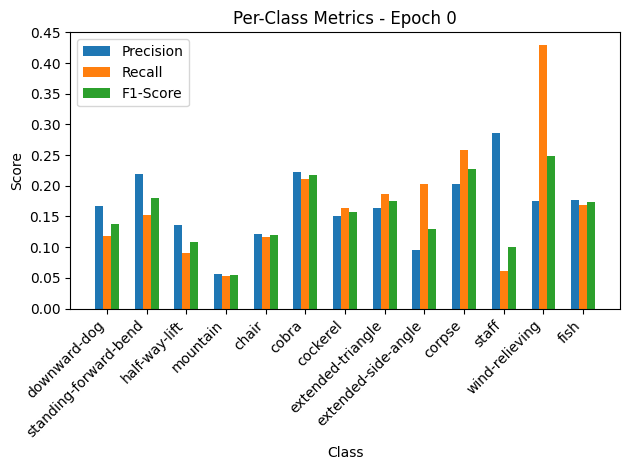

Validation: 100%|██████████| 8/8 [00:27<00:00,  3.39s/it, loss=2.05, accuracy=33.6]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Per-Class Metrics for Epoch 0:
downward-dog: Precision=0.00, Recall=0.00, F1-Score=0.00
standing-forward-bend: Precision=0.56, Recall=0.60, F1-Score=0.58
half-way-lift: Precision=0.33, Recall=0.07, F1-Score=0.12
mountain: Precision=0.40, Recall=0.20, F1-Score=0.27
chair: Precision=0.36, Recall=0.50, F1-Score=0.42
cobra: Precision=0.44, Recall=0.44, F1-Score=0.44
cockerel: Precision=0.30, Recall=0.33, F1-Score=0.32
extended-triangle: Precision=0.21, Recall=0.43, F1-Score=0.29
extended-side-angle: Precision=0.16, Recall=0.43, F1-Score=0.23
corpse: Precision=0.00, Recall=0.00, F1-Score=0.00
staff: Precision=0.25, Recall=0.14, F1-Score=0.18
wind-relieving: Precision=0.67, Recall=0.57, F1-Score=0.62
fish: Precision=0.28, Recall=1.00, F1-Score=0.44


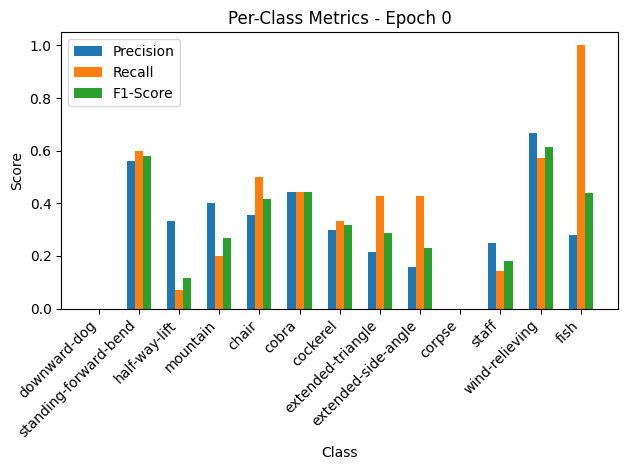


Epoch 1/50 Summary:
Train Loss: 2.4129 | Train Acc: 15.73% | Train Precision: 0.17 | Train Recall: 0.17 | Train F1: 0.16
Val Loss: 2.0942 | Val Acc: 33.60% | Val Precision: 0.31 | Val Recall: 0.36 | Val F1: 0.30
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Saving checkpoint to /kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Checkpoint saved at epoch 1
New best model saved! Validation Loss: 2.0942

Epoch 2/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:17<00:00,  3.68s/it, loss=1.9, accuracy=31.8] 

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 1:
downward-dog: Precision=0.24, Recall=0.12, F1-Score=0.16
standing-forward-bend: Precision=0.36, Recall=0.26, F1-Score=0.30
half-way-lift: Precision=0.28, Recall=0.16, F1-Score=0.20
mountain: Precision=0.24, Recall=0.24, F1-Score=0.24
chair: Precision=0.34, Recall=0.33, F1-Score=0.33
cobra: Precision=0.38, Recall=0.46, F1-Score=0.41
cockerel: Precision=0.43, Recall=0.47, F1-Score=0.45
extended-triangle: Precision=0.20, Recall=0.44, F1-Score=0.28
extended-side-angle: Precision=0.19, Recall=0.36, F1-Score=0.25
corpse: Precision=0.46, Recall=0.41, F1-Score=0.43
staff: Precision=0.38, Recall=0.38, F1-Score=0.38
wind-relieving: Precision=0.44, Recall=0.68, F1-Score=0.53
fish: Precision=0.30, Recall=0.25, F1-Score=0.27


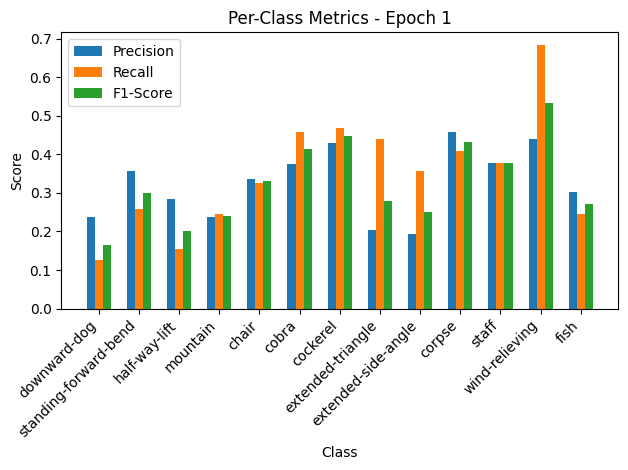

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it, loss=1.62, accuracy=43.2]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Per-Class Metrics for Epoch 1:
downward-dog: Precision=0.00, Recall=0.00, F1-Score=0.00
standing-forward-bend: Precision=0.80, Recall=0.53, F1-Score=0.64
half-way-lift: Precision=0.29, Recall=0.29, F1-Score=0.29
mountain: Precision=0.40, Recall=0.60, F1-Score=0.48
chair: Precision=0.70, Recall=0.70, F1-Score=0.70
cobra: Precision=0.41, Recall=0.78, F1-Score=0.54
cockerel: Precision=0.60, Recall=0.33, F1-Score=0.43
extended-triangle: Precision=0.25, Recall=0.43, F1-Score=0.32
extended-side-angle: Precision=0.23, Recall=0.43, F1-Score=0.30
corpse: Precision=0.25, Recall=0.14, F1-Score=0.18
staff: Precision=1.00, Recall=0.43, F1-Score=0.60
wind-relieving: Precision=0.46, Recall=0.86, F1-Score=0.60
fish: Precision=0.33, Recall=0.43, F1-Score=0.38


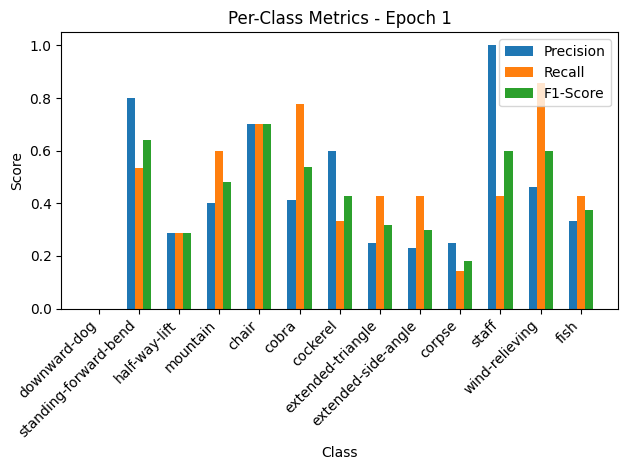


Epoch 2/50 Summary:
Train Loss: 1.8969 | Train Acc: 31.81% | Train Precision: 0.33 | Train Recall: 0.35 | Train F1: 0.33
Val Loss: 1.6626 | Val Acc: 43.20% | Val Precision: 0.44 | Val Recall: 0.46 | Val F1: 0.42
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Saving checkpoint to /kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Checkpoint saved at epoch 2
New best model saved! Validation Loss: 1.6626

Epoch 3/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:21<00:00,  3.73s/it, loss=1.53, accuracy=46.1]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 2:
downward-dog: Precision=0.46, Recall=0.28, F1-Score=0.35
standing-forward-bend: Precision=0.40, Recall=0.28, F1-Score=0.33
half-way-lift: Precision=0.47, Recall=0.41, F1-Score=0.44
mountain: Precision=0.37, Recall=0.45, F1-Score=0.40
chair: Precision=0.40, Recall=0.53, F1-Score=0.46
cobra: Precision=0.51, Recall=0.46, F1-Score=0.48
cockerel: Precision=0.51, Recall=0.66, F1-Score=0.57
extended-triangle: Precision=0.46, Recall=0.53, F1-Score=0.49
extended-side-angle: Precision=0.31, Recall=0.44, F1-Score=0.37
corpse: Precision=0.53, Recall=0.58, F1-Score=0.55
staff: Precision=0.49, Recall=0.56, F1-Score=0.52
wind-relieving: Precision=0.68, Recall=0.75, F1-Score=0.71
fish: Precision=0.52, Recall=0.46, F1-Score=0.49


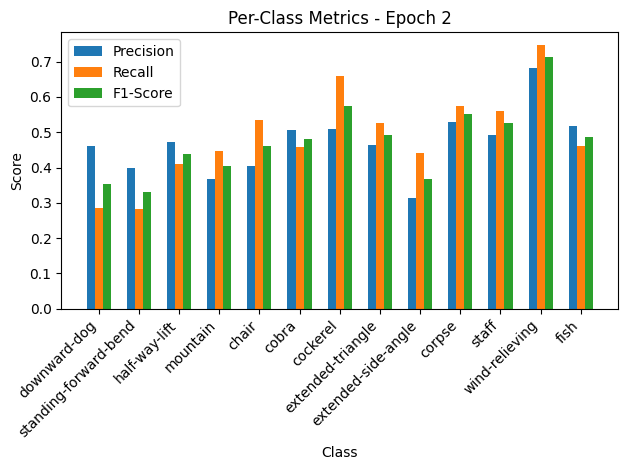

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.29s/it, loss=1.35, accuracy=48]  


Per-Class Metrics for Epoch 2:
downward-dog: Precision=0.00, Recall=0.00, F1-Score=0.00
standing-forward-bend: Precision=0.47, Recall=0.53, F1-Score=0.50
half-way-lift: Precision=0.44, Recall=0.29, F1-Score=0.35
mountain: Precision=0.83, Recall=0.50, F1-Score=0.62
chair: Precision=0.67, Recall=0.60, F1-Score=0.63
cobra: Precision=0.57, Recall=0.89, F1-Score=0.70
cockerel: Precision=0.46, Recall=0.67, F1-Score=0.55
extended-triangle: Precision=0.22, Recall=0.86, F1-Score=0.35
extended-side-angle: Precision=0.00, Recall=0.00, F1-Score=0.00
corpse: Precision=0.67, Recall=0.29, F1-Score=0.40
staff: Precision=1.00, Recall=0.43, F1-Score=0.60
wind-relieving: Precision=0.86, Recall=0.86, F1-Score=0.86
fish: Precision=0.50, Recall=0.86, F1-Score=0.63


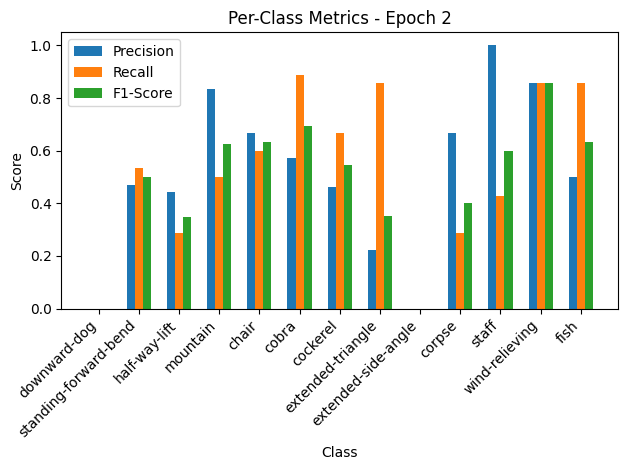


Epoch 3/50 Summary:
Train Loss: 1.5354 | Train Acc: 46.11% | Train Precision: 0.47 | Train Recall: 0.49 | Train F1: 0.47
Val Loss: 1.3838 | Val Acc: 48.00% | Val Precision: 0.51 | Val Recall: 0.52 | Val F1: 0.48
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Saving checkpoint to /kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Checkpoint saved at epoch 3
New best model saved! Validation Loss: 1.3838

Epoch 4/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:14<00:00,  3.63s/it, loss=1.27, accuracy=55.9]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 3:
downward-dog: Precision=0.61, Recall=0.35, F1-Score=0.44
standing-forward-bend: Precision=0.47, Recall=0.46, F1-Score=0.47
half-way-lift: Precision=0.53, Recall=0.49, F1-Score=0.51
mountain: Precision=0.60, Recall=0.52, F1-Score=0.56
chair: Precision=0.52, Recall=0.63, F1-Score=0.57
cobra: Precision=0.70, Recall=0.53, F1-Score=0.60
cockerel: Precision=0.61, Recall=0.68, F1-Score=0.65
extended-triangle: Precision=0.39, Recall=0.68, F1-Score=0.49
extended-side-angle: Precision=0.44, Recall=0.46, F1-Score=0.45
corpse: Precision=0.61, Recall=0.70, F1-Score=0.65
staff: Precision=0.70, Recall=0.80, F1-Score=0.75
wind-relieving: Precision=0.70, Recall=0.83, F1-Score=0.76
fish: Precision=0.51, Recall=0.54, F1-Score=0.53


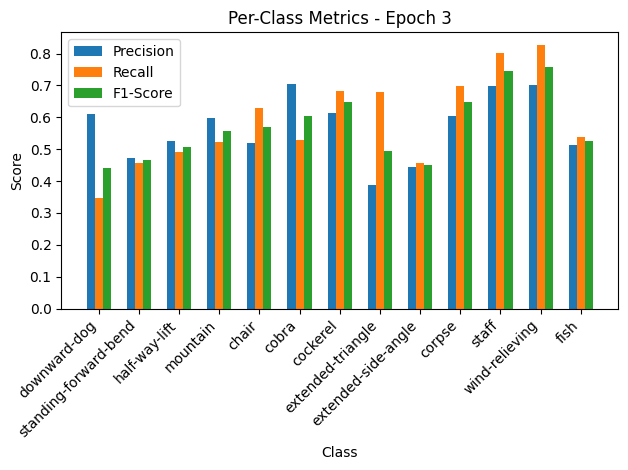

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.31s/it, loss=1.22, accuracy=55.2]


Per-Class Metrics for Epoch 3:
downward-dog: Precision=1.00, Recall=0.25, F1-Score=0.40
standing-forward-bend: Precision=0.43, Recall=0.60, F1-Score=0.50
half-way-lift: Precision=0.57, Recall=0.29, F1-Score=0.38
mountain: Precision=0.42, Recall=0.80, F1-Score=0.55
chair: Precision=0.83, Recall=0.50, F1-Score=0.62
cobra: Precision=0.80, Recall=0.89, F1-Score=0.84
cockerel: Precision=0.67, Recall=0.67, F1-Score=0.67
extended-triangle: Precision=0.50, Recall=0.14, F1-Score=0.22
extended-side-angle: Precision=0.25, Recall=0.71, F1-Score=0.37
corpse: Precision=0.50, Recall=0.29, F1-Score=0.36
staff: Precision=0.70, Recall=1.00, F1-Score=0.82
wind-relieving: Precision=1.00, Recall=0.57, F1-Score=0.73
fish: Precision=0.67, Recall=0.86, F1-Score=0.75


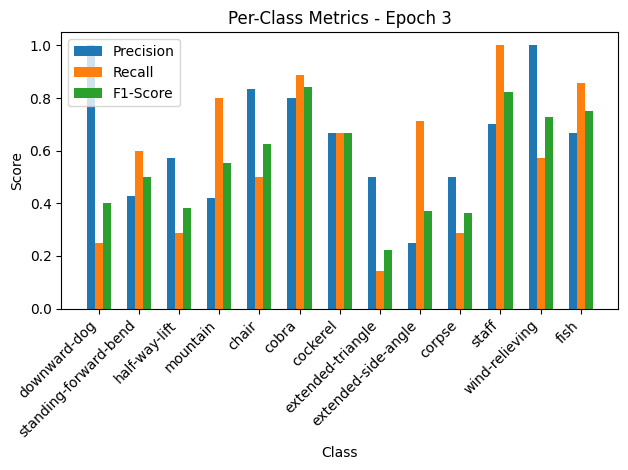


Epoch 4/50 Summary:
Train Loss: 1.2726 | Train Acc: 55.85% | Train Precision: 0.57 | Train Recall: 0.59 | Train F1: 0.57
Val Loss: 1.2481 | Val Acc: 55.20% | Val Precision: 0.64 | Val Recall: 0.58 | Val F1: 0.56
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Saving checkpoint to /kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Checkpoint saved at epoch 4
New best model saved! Validation Loss: 1.2481

Epoch 5/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:22<00:00,  3.76s/it, loss=1.13, accuracy=61.6]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 4:
downward-dog: Precision=0.72, Recall=0.48, F1-Score=0.57
standing-forward-bend: Precision=0.50, Recall=0.55, F1-Score=0.53
half-way-lift: Precision=0.54, Recall=0.43, F1-Score=0.47
mountain: Precision=0.61, Recall=0.70, F1-Score=0.65
chair: Precision=0.66, Recall=0.66, F1-Score=0.66
cobra: Precision=0.76, Recall=0.61, F1-Score=0.68
cockerel: Precision=0.63, Recall=0.72, F1-Score=0.67
extended-triangle: Precision=0.55, Recall=0.64, F1-Score=0.59
extended-side-angle: Precision=0.47, Recall=0.58, F1-Score=0.52
corpse: Precision=0.68, Recall=0.70, F1-Score=0.69
staff: Precision=0.69, Recall=0.88, F1-Score=0.77
wind-relieving: Precision=0.73, Recall=0.76, F1-Score=0.74
fish: Precision=0.56, Recall=0.62, F1-Score=0.59


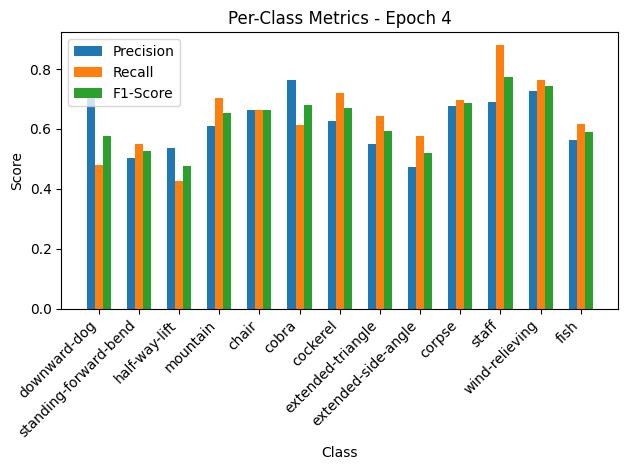

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.28s/it, loss=1.16, accuracy=56.8]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Per-Class Metrics for Epoch 4:
downward-dog: Precision=0.52, Recall=0.69, F1-Score=0.59
standing-forward-bend: Precision=0.73, Recall=0.53, F1-Score=0.62
half-way-lift: Precision=0.44, Recall=0.50, F1-Score=0.47
mountain: Precision=0.67, Recall=0.20, F1-Score=0.31
chair: Precision=0.47, Recall=0.80, F1-Score=0.59
cobra: Precision=0.86, Recall=0.67, F1-Score=0.75
cockerel: Precision=0.57, Recall=0.89, F1-Score=0.70
extended-triangle: Precision=0.62, Recall=0.71, F1-Score=0.67
extended-side-angle: Precision=1.00, Recall=0.14, F1-Score=0.25
corpse: Precision=0.00, Recall=0.00, F1-Score=0.00
staff: Precision=1.00, Recall=0.86, F1-Score=0.92
wind-relieving: Precision=0.46, Recall=0.86, F1-Score=0.60
fish: Precision=0.38, Recall=0.43, F1-Score=0.40


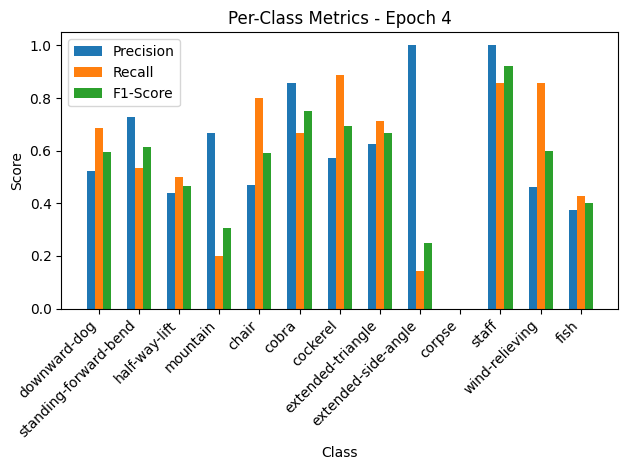


Epoch 5/50 Summary:
Train Loss: 1.1349 | Train Acc: 61.57% | Train Precision: 0.62 | Train Recall: 0.64 | Train F1: 0.63
Val Loss: 1.1854 | Val Acc: 56.80% | Val Precision: 0.59 | Val Recall: 0.56 | Val F1: 0.53
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Saving checkpoint to /kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Checkpoint saved at epoch 5
New best model saved! Validation Loss: 1.1854

Epoch 6/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:03<00:00,  3.48s/it, loss=0.972, accuracy=67.6]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 5:
downward-dog: Precision=0.77, Recall=0.64, F1-Score=0.70
standing-forward-bend: Precision=0.55, Recall=0.44, F1-Score=0.49
half-way-lift: Precision=0.57, Recall=0.61, F1-Score=0.59
mountain: Precision=0.67, Recall=0.68, F1-Score=0.67
chair: Precision=0.66, Recall=0.69, F1-Score=0.67
cobra: Precision=0.78, Recall=0.71, F1-Score=0.74
cockerel: Precision=0.71, Recall=0.78, F1-Score=0.75
extended-triangle: Precision=0.72, Recall=0.75, F1-Score=0.73
extended-side-angle: Precision=0.54, Recall=0.75, F1-Score=0.63
corpse: Precision=0.76, Recall=0.64, F1-Score=0.69
staff: Precision=0.72, Recall=0.83, F1-Score=0.77
wind-relieving: Precision=0.87, Recall=0.87, F1-Score=0.87
fish: Precision=0.59, Recall=0.74, F1-Score=0.66


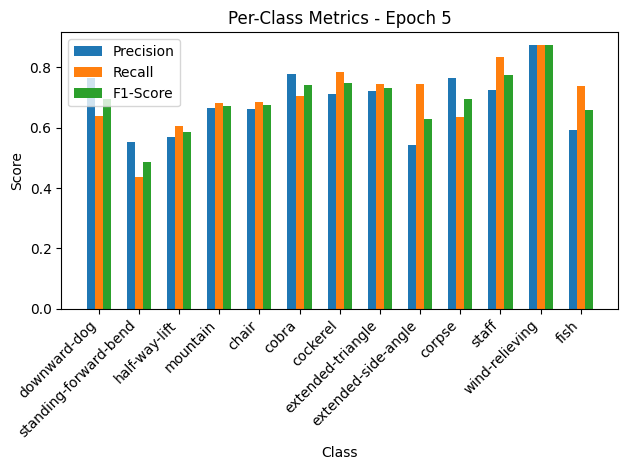

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.25s/it, loss=1.08, accuracy=56.8] 


Per-Class Metrics for Epoch 5:
downward-dog: Precision=0.62, Recall=0.31, F1-Score=0.42
standing-forward-bend: Precision=0.67, Recall=0.27, F1-Score=0.38
half-way-lift: Precision=0.41, Recall=0.64, F1-Score=0.50
mountain: Precision=0.67, Recall=0.60, F1-Score=0.63
chair: Precision=0.62, Recall=0.80, F1-Score=0.70
cobra: Precision=1.00, Recall=1.00, F1-Score=1.00
cockerel: Precision=0.60, Recall=0.67, F1-Score=0.63
extended-triangle: Precision=0.38, Recall=0.71, F1-Score=0.50
extended-side-angle: Precision=0.25, Recall=0.29, F1-Score=0.27
corpse: Precision=0.50, Recall=0.14, F1-Score=0.22
staff: Precision=0.88, Recall=1.00, F1-Score=0.93
wind-relieving: Precision=0.60, Recall=0.86, F1-Score=0.71
fish: Precision=0.43, Recall=0.43, F1-Score=0.43


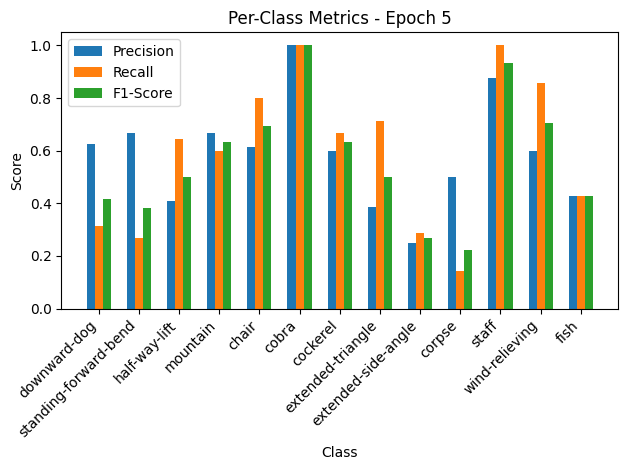


Epoch 6/50 Summary:
Train Loss: 0.9726 | Train Acc: 67.56% | Train Precision: 0.69 | Train Recall: 0.70 | Train F1: 0.69
Val Loss: 1.1064 | Val Acc: 56.80% | Val Precision: 0.59 | Val Recall: 0.59 | Val F1: 0.56
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Saving checkpoint to /kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Checkpoint saved at epoch 6
New best model saved! Validation Loss: 1.1064

Epoch 7/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:08<00:00,  3.56s/it, loss=0.956, accuracy=69.4]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 6:
downward-dog: Precision=0.74, Recall=0.62, F1-Score=0.68
standing-forward-bend: Precision=0.60, Recall=0.62, F1-Score=0.61
half-way-lift: Precision=0.60, Recall=0.56, F1-Score=0.58
mountain: Precision=0.71, Recall=0.69, F1-Score=0.70
chair: Precision=0.69, Recall=0.73, F1-Score=0.71
cobra: Precision=0.83, Recall=0.73, F1-Score=0.77
cockerel: Precision=0.80, Recall=0.81, F1-Score=0.81
extended-triangle: Precision=0.65, Recall=0.80, F1-Score=0.72
extended-side-angle: Precision=0.58, Recall=0.58, F1-Score=0.58
corpse: Precision=0.70, Recall=0.65, F1-Score=0.68
staff: Precision=0.73, Recall=0.92, F1-Score=0.82
wind-relieving: Precision=0.78, Recall=0.90, F1-Score=0.84
fish: Precision=0.65, Recall=0.65, F1-Score=0.65


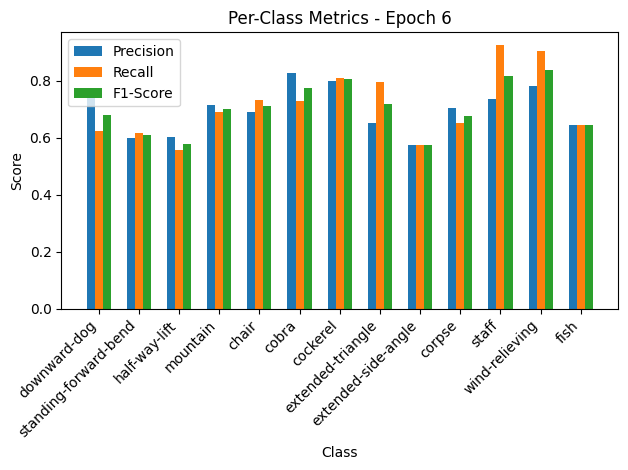

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.26s/it, loss=0.963, accuracy=61.6]


Per-Class Metrics for Epoch 6:
downward-dog: Precision=0.75, Recall=0.38, F1-Score=0.50
standing-forward-bend: Precision=0.67, Recall=0.53, F1-Score=0.59
half-way-lift: Precision=0.47, Recall=0.50, F1-Score=0.48
mountain: Precision=0.80, Recall=0.40, F1-Score=0.53
chair: Precision=0.50, Recall=0.80, F1-Score=0.62
cobra: Precision=0.64, Recall=1.00, F1-Score=0.78
cockerel: Precision=0.58, Recall=0.78, F1-Score=0.67
extended-triangle: Precision=0.50, Recall=0.57, F1-Score=0.53
extended-side-angle: Precision=0.50, Recall=0.57, F1-Score=0.53
corpse: Precision=0.62, Recall=0.71, F1-Score=0.67
staff: Precision=0.75, Recall=0.86, F1-Score=0.80
wind-relieving: Precision=0.86, Recall=0.86, F1-Score=0.86
fish: Precision=0.75, Recall=0.43, F1-Score=0.55


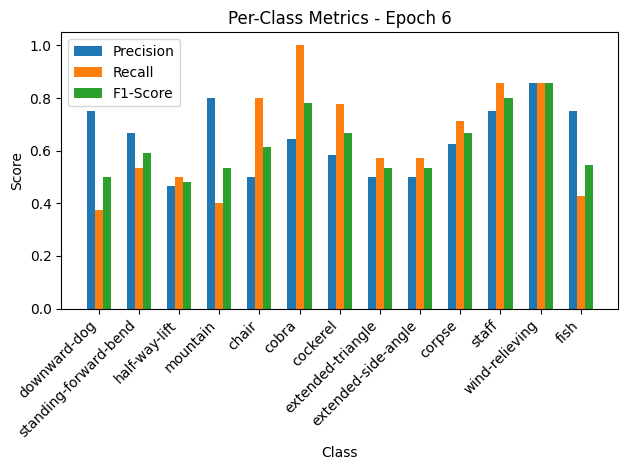


Epoch 7/50 Summary:
Train Loss: 0.9567 | Train Acc: 69.44% | Train Precision: 0.70 | Train Recall: 0.71 | Train F1: 0.70
Val Loss: 0.9858 | Val Acc: 61.60% | Val Precision: 0.65 | Val Recall: 0.65 | Val F1: 0.62
/kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Saving checkpoint to /kaggle/working/BS16_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-27_LR0.0005_LHS128_LL1_CTvgg16_FROZEN_True_NLUF_1/best_model_fold_0.pth
Checkpoint saved at epoch 7
New best model saved! Validation Loss: 0.9858

Epoch 8/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:10<00:00,  3.58s/it, loss=0.876, accuracy=74.1]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 7:
downward-dog: Precision=0.75, Recall=0.74, F1-Score=0.74
standing-forward-bend: Precision=0.66, Recall=0.56, F1-Score=0.61
half-way-lift: Precision=0.64, Recall=0.64, F1-Score=0.64
mountain: Precision=0.80, Recall=0.72, F1-Score=0.76
chair: Precision=0.63, Recall=0.71, F1-Score=0.67
cobra: Precision=0.89, Recall=0.78, F1-Score=0.83
cockerel: Precision=0.71, Recall=0.85, F1-Score=0.77
extended-triangle: Precision=0.85, Recall=0.85, F1-Score=0.85
extended-side-angle: Precision=0.67, Recall=0.69, F1-Score=0.68
corpse: Precision=0.83, Recall=0.73, F1-Score=0.77
staff: Precision=0.78, Recall=0.94, F1-Score=0.86
wind-relieving: Precision=0.87, Recall=0.92, F1-Score=0.89
fish: Precision=0.71, Recall=0.77, F1-Score=0.74


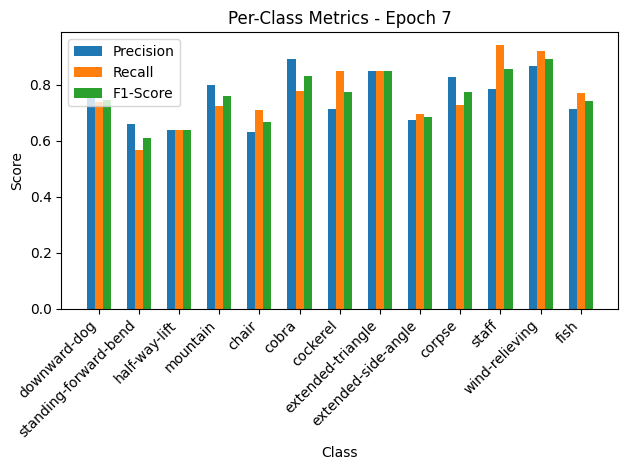

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.26s/it, loss=1.01, accuracy=61.6] 


Per-Class Metrics for Epoch 7:
downward-dog: Precision=0.54, Recall=0.44, F1-Score=0.48
standing-forward-bend: Precision=0.69, Recall=0.60, F1-Score=0.64
half-way-lift: Precision=0.50, Recall=0.43, F1-Score=0.46
mountain: Precision=0.62, Recall=0.50, F1-Score=0.56
chair: Precision=0.67, Recall=0.60, F1-Score=0.63
cobra: Precision=0.70, Recall=0.78, F1-Score=0.74
cockerel: Precision=0.67, Recall=0.67, F1-Score=0.67
extended-triangle: Precision=0.36, Recall=0.57, F1-Score=0.44
extended-side-angle: Precision=0.57, Recall=0.57, F1-Score=0.57
corpse: Precision=0.50, Recall=1.00, F1-Score=0.67
staff: Precision=0.88, Recall=1.00, F1-Score=0.93
wind-relieving: Precision=0.83, Recall=0.71, F1-Score=0.77
fish: Precision=0.80, Recall=0.57, F1-Score=0.67


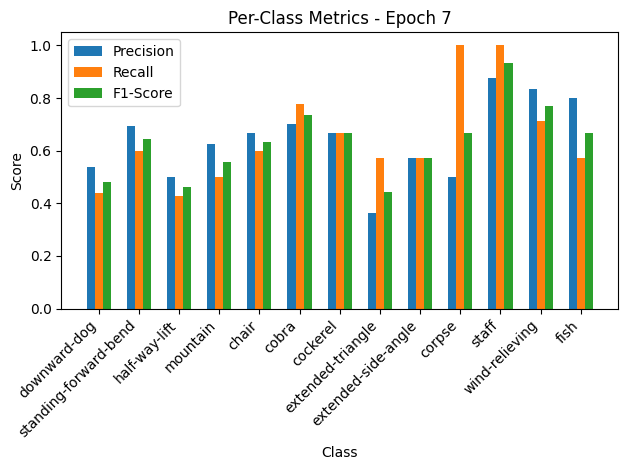


Epoch 8/50 Summary:
Train Loss: 0.8769 | Train Acc: 74.08% | Train Precision: 0.75 | Train Recall: 0.76 | Train F1: 0.76
Val Loss: 1.0379 | Val Acc: 61.60% | Val Precision: 0.64 | Val Recall: 0.65 | Val F1: 0.63

Epoch 9/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:16<00:00,  3.66s/it, loss=0.846, accuracy=74.7]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 8:
downward-dog: Precision=0.80, Recall=0.72, F1-Score=0.76
standing-forward-bend: Precision=0.62, Recall=0.63, F1-Score=0.62
half-way-lift: Precision=0.68, Recall=0.62, F1-Score=0.65
mountain: Precision=0.74, Recall=0.77, F1-Score=0.75
chair: Precision=0.77, Recall=0.77, F1-Score=0.77
cobra: Precision=0.83, Recall=0.85, F1-Score=0.84
cockerel: Precision=0.76, Recall=0.85, F1-Score=0.80
extended-triangle: Precision=0.75, Recall=0.80, F1-Score=0.77
extended-side-angle: Precision=0.62, Recall=0.69, F1-Score=0.66
corpse: Precision=0.72, Recall=0.76, F1-Score=0.74
staff: Precision=0.85, Recall=0.88, F1-Score=0.87
wind-relieving: Precision=0.89, Recall=0.90, F1-Score=0.90
fish: Precision=0.77, Recall=0.68, F1-Score=0.72


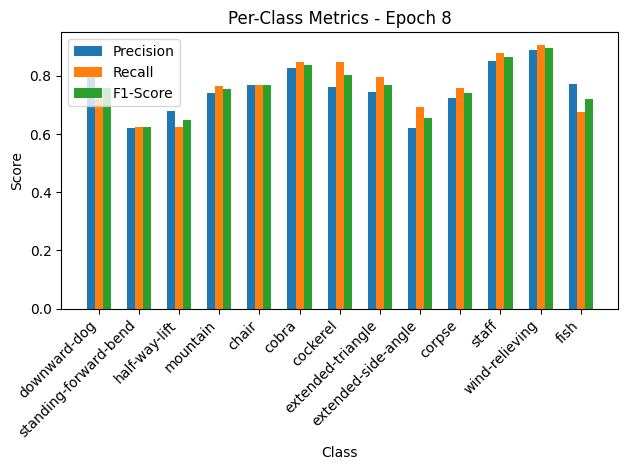

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.30s/it, loss=1.07, accuracy=63.2] 


Per-Class Metrics for Epoch 8:
downward-dog: Precision=0.64, Recall=0.44, F1-Score=0.52
standing-forward-bend: Precision=0.89, Recall=0.53, F1-Score=0.67
half-way-lift: Precision=0.67, Recall=0.43, F1-Score=0.52
mountain: Precision=0.55, Recall=0.60, F1-Score=0.57
chair: Precision=0.75, Recall=0.60, F1-Score=0.67
cobra: Precision=0.69, Recall=1.00, F1-Score=0.82
cockerel: Precision=0.67, Recall=0.67, F1-Score=0.67
extended-triangle: Precision=0.40, Recall=0.29, F1-Score=0.33
extended-side-angle: Precision=0.30, Recall=1.00, F1-Score=0.47
corpse: Precision=0.67, Recall=0.86, F1-Score=0.75
staff: Precision=0.88, Recall=1.00, F1-Score=0.93
wind-relieving: Precision=1.00, Recall=0.86, F1-Score=0.92
fish: Precision=0.75, Recall=0.43, F1-Score=0.55


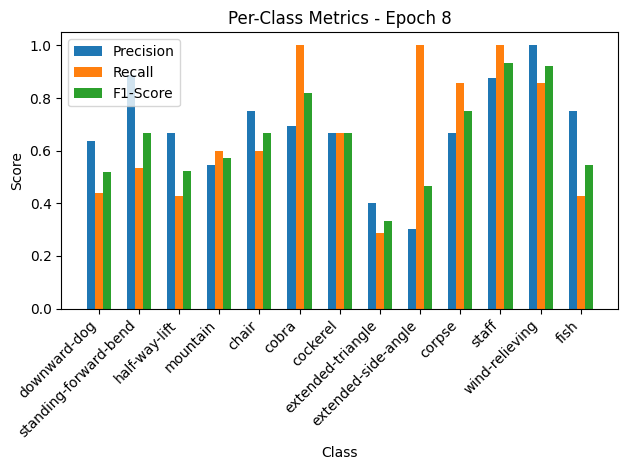


Epoch 9/50 Summary:
Train Loss: 0.8467 | Train Acc: 74.71% | Train Precision: 0.75 | Train Recall: 0.76 | Train F1: 0.76
Val Loss: 1.0991 | Val Acc: 63.20% | Val Precision: 0.68 | Val Recall: 0.67 | Val F1: 0.64

Epoch 10/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:23<00:00,  3.76s/it, loss=0.795, accuracy=75.9]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 9:
downward-dog: Precision=0.83, Recall=0.76, F1-Score=0.80
standing-forward-bend: Precision=0.74, Recall=0.52, F1-Score=0.61
half-way-lift: Precision=0.62, Recall=0.75, F1-Score=0.68
mountain: Precision=0.74, Recall=0.82, F1-Score=0.78
chair: Precision=0.78, Recall=0.76, F1-Score=0.77
cobra: Precision=0.91, Recall=0.74, F1-Score=0.82
cockerel: Precision=0.77, Recall=0.87, F1-Score=0.82
extended-triangle: Precision=0.69, Recall=0.81, F1-Score=0.74
extended-side-angle: Precision=0.76, Recall=0.71, F1-Score=0.74
corpse: Precision=0.75, Recall=0.77, F1-Score=0.76
staff: Precision=0.81, Recall=0.92, F1-Score=0.87
wind-relieving: Precision=0.86, Recall=0.95, F1-Score=0.90
fish: Precision=0.68, Recall=0.66, F1-Score=0.67


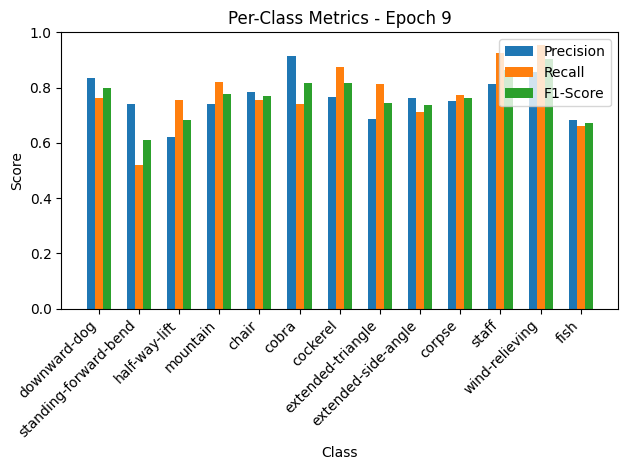

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.27s/it, loss=1.08, accuracy=61.6] 


Per-Class Metrics for Epoch 9:
downward-dog: Precision=0.50, Recall=0.69, F1-Score=0.58
standing-forward-bend: Precision=0.67, Recall=0.27, F1-Score=0.38
half-way-lift: Precision=0.33, Recall=0.50, F1-Score=0.40
mountain: Precision=0.86, Recall=0.60, F1-Score=0.71
chair: Precision=1.00, Recall=0.50, F1-Score=0.67
cobra: Precision=0.89, Recall=0.89, F1-Score=0.89
cockerel: Precision=0.75, Recall=0.67, F1-Score=0.71
extended-triangle: Precision=0.38, Recall=0.43, F1-Score=0.40
extended-side-angle: Precision=0.62, Recall=0.71, F1-Score=0.67
corpse: Precision=0.55, Recall=0.86, F1-Score=0.67
staff: Precision=0.88, Recall=1.00, F1-Score=0.93
wind-relieving: Precision=1.00, Recall=0.71, F1-Score=0.83
fish: Precision=0.57, Recall=0.57, F1-Score=0.57


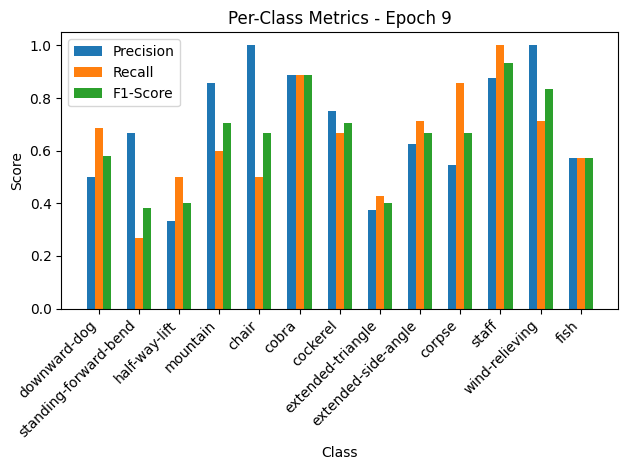


Epoch 10/50 Summary:
Train Loss: 0.7958 | Train Acc: 75.87% | Train Precision: 0.77 | Train Recall: 0.77 | Train F1: 0.77
Val Loss: 1.1035 | Val Acc: 61.60% | Val Precision: 0.69 | Val Recall: 0.65 | Val F1: 0.65

Epoch 11/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:31<00:00,  3.88s/it, loss=0.748, accuracy=78.9]

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 10:
downward-dog: Precision=0.85, Recall=0.83, F1-Score=0.84
standing-forward-bend: Precision=0.72, Recall=0.63, F1-Score=0.67
half-way-lift: Precision=0.67, Recall=0.70, F1-Score=0.69
mountain: Precision=0.80, Recall=0.83, F1-Score=0.82
chair: Precision=0.73, Recall=0.72, F1-Score=0.73
cobra: Precision=0.88, Recall=0.85, F1-Score=0.86
cockerel: Precision=0.82, Recall=0.86, F1-Score=0.84
extended-triangle: Precision=0.82, Recall=0.85, F1-Score=0.83
extended-side-angle: Precision=0.77, Recall=0.80, F1-Score=0.78
corpse: Precision=0.78, Recall=0.79, F1-Score=0.78
staff: Precision=0.88, Recall=0.97, F1-Score=0.92
wind-relieving: Precision=0.89, Recall=0.89, F1-Score=0.89
fish: Precision=0.73, Recall=0.71, F1-Score=0.72


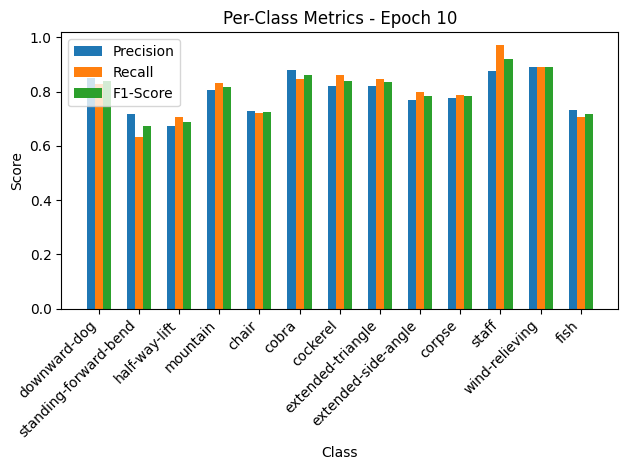

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.27s/it, loss=0.998, accuracy=64]  


Per-Class Metrics for Epoch 10:
downward-dog: Precision=0.77, Recall=0.62, F1-Score=0.69
standing-forward-bend: Precision=0.67, Recall=0.80, F1-Score=0.73
half-way-lift: Precision=0.54, Recall=0.50, F1-Score=0.52
mountain: Precision=0.88, Recall=0.70, F1-Score=0.78
chair: Precision=0.58, Recall=0.70, F1-Score=0.64
cobra: Precision=1.00, Recall=0.89, F1-Score=0.94
cockerel: Precision=0.50, Recall=0.67, F1-Score=0.57
extended-triangle: Precision=0.38, Recall=0.43, F1-Score=0.40
extended-side-angle: Precision=0.40, Recall=0.57, F1-Score=0.47
corpse: Precision=0.60, Recall=0.43, F1-Score=0.50
staff: Precision=1.00, Recall=1.00, F1-Score=1.00
wind-relieving: Precision=0.67, Recall=0.57, F1-Score=0.62
fish: Precision=0.40, Recall=0.29, F1-Score=0.33


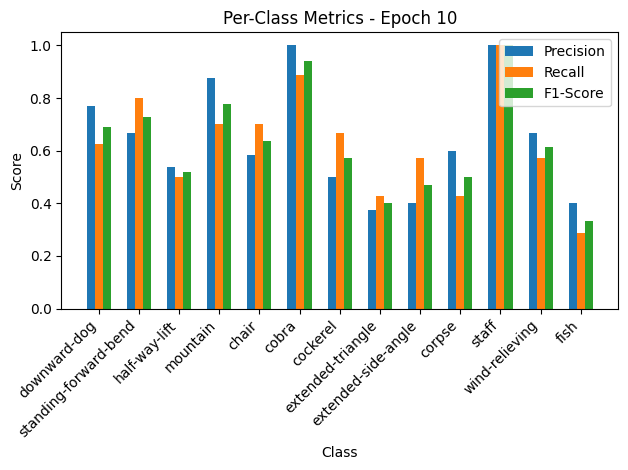


Epoch 11/50 Summary:
Train Loss: 0.7485 | Train Acc: 78.91% | Train Precision: 0.79 | Train Recall: 0.80 | Train F1: 0.80
Val Loss: 1.0223 | Val Acc: 64.00% | Val Precision: 0.64 | Val Recall: 0.63 | Val F1: 0.63

Epoch 12/50
Current Learning Rate: 0.0005


Training: 100%|██████████| 70/70 [04:35<00:00,  3.94s/it, loss=0.757, accuracy=79]  

INPUT_SIZE: 15
TRAIN LOADER LENGTH: 1119
TRAIN TOTAL: 1119
Per-Class Metrics for Epoch 11:
downward-dog: Precision=0.85, Recall=0.81, F1-Score=0.83
standing-forward-bend: Precision=0.74, Recall=0.70, F1-Score=0.72
half-way-lift: Precision=0.74, Recall=0.79, F1-Score=0.76
mountain: Precision=0.79, Recall=0.85, F1-Score=0.82
chair: Precision=0.85, Recall=0.77, F1-Score=0.80
cobra: Precision=0.86, Recall=0.85, F1-Score=0.85
cockerel: Precision=0.85, Recall=0.81, F1-Score=0.83
extended-triangle: Precision=0.72, Recall=0.71, F1-Score=0.72
extended-side-angle: Precision=0.65, Recall=0.75, F1-Score=0.69
corpse: Precision=0.82, Recall=0.68, F1-Score=0.74
staff: Precision=0.84, Recall=0.92, F1-Score=0.88
wind-relieving: Precision=0.81, Recall=0.87, F1-Score=0.84
fish: Precision=0.74, Recall=0.77, F1-Score=0.75


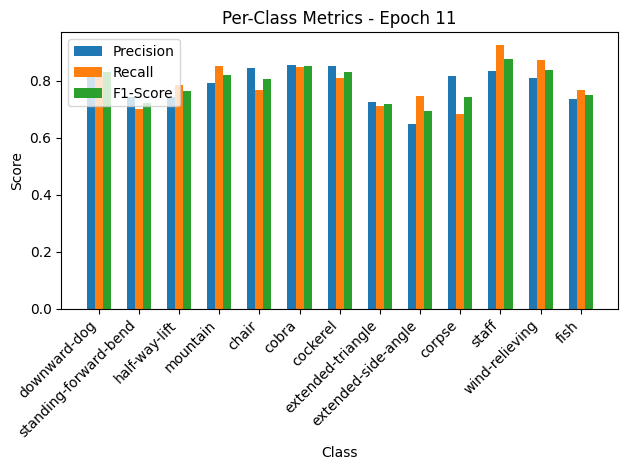

Validation: 100%|██████████| 8/8 [00:18<00:00,  2.27s/it, loss=1.04, accuracy=59.2] 


Per-Class Metrics for Epoch 11:
downward-dog: Precision=0.69, Recall=0.56, F1-Score=0.62
standing-forward-bend: Precision=0.83, Recall=0.33, F1-Score=0.48
half-way-lift: Precision=0.40, Recall=0.57, F1-Score=0.47
mountain: Precision=0.56, Recall=0.50, F1-Score=0.53
chair: Precision=0.67, Recall=0.60, F1-Score=0.63
cobra: Precision=0.89, Recall=0.89, F1-Score=0.89
cockerel: Precision=0.53, Recall=0.89, F1-Score=0.67
extended-triangle: Precision=0.50, Recall=0.43, F1-Score=0.46
extended-side-angle: Precision=0.50, Recall=0.71, F1-Score=0.59
corpse: Precision=0.50, Recall=0.14, F1-Score=0.22
staff: Precision=1.00, Recall=0.86, F1-Score=0.92
wind-relieving: Precision=0.67, Recall=0.86, F1-Score=0.75
fish: Precision=0.36, Recall=0.57, F1-Score=0.44


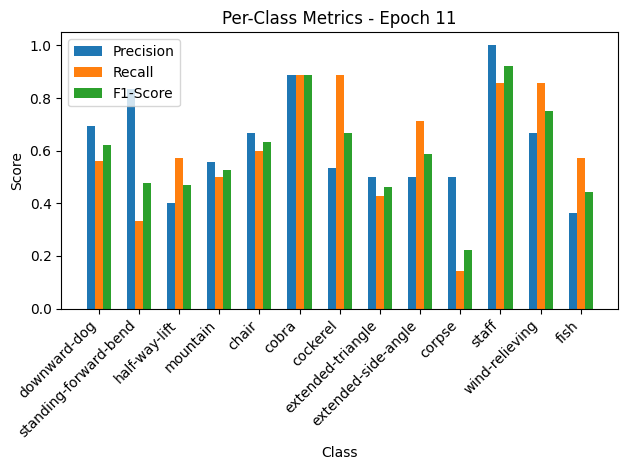


Epoch 12/50 Summary:
Train Loss: 0.7581 | Train Acc: 79.00% | Train Precision: 0.79 | Train Recall: 0.79 | Train F1: 0.79
Val Loss: 1.0665 | Val Acc: 59.20% | Val Precision: 0.62 | Val Recall: 0.61 | Val F1: 0.59

Epoch 13/50
Current Learning Rate: 0.0005


Training:  60%|██████    | 42/70 [02:40<01:37,  3.47s/it, loss=0.775, accuracy=79.2]

In [ ]:
if __name__ == "__main__":
    main()
#

In [ ]:
!zip -r /kaggle/working/RENET_18_FROZEN_FEB_26.zip /kaggle/working

In [ ]:
!ls /kaggle/working

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
import numpy as np
import os
from tqdm import tqdm
import csv

def find_sus(model, test_loader, criterion, class_names, spath=SAVE_PATH, fsave='confusion_matrix_all.png'):
    """
    Evaluate model on test set

    Args:
        model: PyTorch model
        test_loader: DataLoader for test data
        criterion: Loss function
        class_names: List of class names
        save_path: Directory to save the plot
        fsave: Filename for confusion matrix plot
    """
    csave = os.path.join(spath, fsave)
    sussave = os.path.join(spath, 'sus.csv')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    test_loss = 0.0
    test_correct = 0
    test_total = 0
    all_predictions = []
    all_labels = []
    misclassified_data = []

    # Create progress bar
    test_loader_tqdm = tqdm(test_loader, desc="Testing")

    with torch.no_grad():
        for batch_idx, (inputs, labels, lengths) in enumerate(test_loader_tqdm):
            inputs = inputs.to(device)
            labels = labels.to(device)
            lengths = lengths.to(device)
            # Forward pass
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            # Get predictions
            _, predicted = torch.max(outputs, 1)
            # Calculate accuracy
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)

            # Store predictions and labels for confusion matrix
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Check if the sample is misclassified
            misclassified_indices = (predicted != labels).nonzero(as_tuple=True)[0]
            for misclassified_idx in misclassified_indices:
                global_idx = batch_idx * inputs.size(0) + misclassified_idx.item()
                sequence_id = test_loader.dataset.idx_to_label[global_idx]
                correct_label = class_names[labels[misclassified_idx].item()]
                prediction = class_names[predicted[misclassified_idx].item()]
                misclassified_data.append([sequence_id, correct_label, prediction])

    # Calculate metrics
    test_loss = test_loss / len(test_loader.dataset)
    accuracy = 100 * test_correct / test_total

    # Create confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=pose_list, yticklabels=pose_list)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Save the plot
    plt.savefig(csave)
    plt.show()
    plt.close()

    # Save misclassified data to CSV
    with open(sussave, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['sequence_id', 'correct_label', 'prediction'])
        writer.writerows(misclassified_data)

    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.2f}%')

    return test_loss, accuracy

In [ ]:
dataset, train_dataset, test_dataset = prepare_dataset()
label_to_pose = {v:k for k,v in dataset.pose_to_label.items()}

model = CNNLSTM(num_classes=NUM_CLASSES, lstm_hidden_size=LSTM_HIDDEN_SIZE, lstm_layers=LSTM_LAYERS, dropout=DROPOUT, cnn_model = CNN_TYPE)
# criterion = nn.CrossEntropyLoss()
all_labels = [dataset[i][1] for i in range(len(dataset))]
criterion = create_weighted_criterion(
        all_labels,
        num_classes= NUM_CLASSES,
        strategy='inverse'  # Try different strategies
    )
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

checkpoint_path = os.path.join(SAVE_PATH, 'best_model.pth')
# Plot the training curves
if checkpoint_path and os.path.exists(checkpoint_path):
        model, optimizer, start_epoch, history = load_checkpoint(
            model, optimizer, checkpoint_path
        )
        print(f"Resuming training from epoch {start_epoch}")
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
# plot_training_curves(history)
find_sus(model, loader, criterion, label_to_pose)